In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
athlete_events=pd.read_csv("athlete_events.csv")
noc_regions=pd.read_csv('noc_regions.csv')

## Filling Age Null Values

In [3]:
sex_avg = athlete_events.groupby('Sex').mean()['Age']

In [4]:
def fillAge(age,sex):
    if pd.isnull(age):
        return sex_avg[sex]
    else:
        return age

In [5]:
athlete_events['Age']=athlete_events.apply(lambda x: fillAge(x['Age'], x['Sex']),axis=1)

## Filling missing Height values

In [6]:
#Datafreames of athletes above and under 18
athletes_above_18=athlete_events[athlete_events["Age"]>=18]
athletes_under_18=athlete_events[athlete_events["Age"]<18]

In [7]:
#Grouping by to get average heights of people below and above 18 years old
height_avg_above_18 = athletes_above_18.groupby(['Sport',"Sex"]).mean()['Height']
height_avg_under_18 = athletes_under_18.groupby(['Sport',"Sex"]).mean()['Height']

In [8]:
#If Height=Null when grouped by Sports and Sex
def ageAbove18M():
    return athletes_above_18[(athletes_above_18['Age']>=18) &(athletes_above_18['Sex']=='M')]['Height'].mean()
def ageUnder18M():
    return athletes_under_18[(athletes_under_18['Age']<18) &(athletes_under_18['Sex']=='M')]['Height'].mean()
def ageAbove18F():
    return athletes_above_18[(athletes_above_18['Age']>=18) &(athletes_above_18['Sex']=='F')]['Height'].mean()
def ageUnder18F():
    return athletes_under_18[(athletes_under_18['Age']<18) &(athletes_under_18['Sex']=='F')]['Height'].mean()

In [9]:
def fillHeight(height,age,sport,sex):
    if pd.isnull(height):
        if((age>=18)&(sex=='M')):
            if (pd.isnull(height_avg_above_18[sport,sex])):
                return ageAbove18M()
            else:
                return height_avg_above_18[sport,sex]
        elif((age>=18)&(sex=='F')):
            if (pd.isnull(height_avg_above_18[sport,sex])):
                return ageAbove18F()
            else:
                return height_avg_above_18[sport,sex]
            
        
        
        elif((age<18)&(sex=='M')):
            if (pd.isnull(height_avg_under_18[sport,sex])):
                return ageUnder18M()
            else:
                return height_avg_under_18[sport,sex]
        else:
               if (pd.isnull(height_avg_under_18[sport,sex])):
                return ageUnder18F()
               else:
                return height_avg_under_18[sport,sex]
    else:
        return height

In [10]:
athlete_events['Height']=athlete_events.apply(lambda x: fillHeight(x['Height'],x['Age'], x['Sport'],x['Sex']),axis=1)

## Filling missing Weight Values

In [11]:
#Grouping by according to age below and above 18 to get average Weight
weight_avg_above_18A= athletes_above_18.groupby(['Sport','Sex']).mean()['Weight']
weight_avg_under_18U= athletes_under_18.groupby(['Sport','Sex']).mean()['Weight']

In [12]:
def ageAbove18MM():
    return athletes_above_18[(athletes_above_18['Age']>=18) &(athletes_above_18['Sex']=='M')]['Weight'].mean()
def ageUnder18MM():
    return athletes_under_18[(athletes_under_18['Age']<18) &(athletes_under_18['Sex']=='M')]['Weight'].mean()
def ageAbove18FF():
    return athletes_above_18[(athletes_above_18['Age']>=18) &(athletes_above_18['Sex']=='F')]['Weight'].mean()
def ageUnder18FF():
    return athletes_under_18[(athletes_under_18['Age']<18) &(athletes_under_18['Sex']=='F')]['Weight'].mean()

In [13]:
def fillWeight(weight,age,sport,sex):
    if pd.isnull(weight):
        if((age>=18)&(sex=='M')):
            if (pd.isnull(weight_avg_above_18A[sport,sex])):
                return ageAbove18MM()
            else:
                return weight_avg_above_18A[sport,sex]
        elif((age>=18)&(sex=='F')):
            if (pd.isnull(weight_avg_above_18A[sport,sex])):
                return ageAbove18FF()
            else:
                return weight_avg_above_18A[sport,sex]
            
        
        
        elif((age<18)&(sex=='M')):
            if (pd.isnull(weight_avg_under_18U[sport,sex])):
                return ageUnder18MM()
            else:
                return weight_avg_under_18U[sport,sex]
        else:
               if (pd.isnull(weight_avg_under_18U[sport,sex])):
                return ageUnder18FF()
               else:
                return weight_avg_under_18U[sport,sex]
    else:
        return weight

In [14]:
athlete_events['Weight']=athlete_events.apply(lambda x: fillWeight(x['Weight'],x['Age'], x['Sport'],x['Sex']),axis=1)

In [15]:
sports=athlete_events['Sport'].unique()
events=athlete_events['Event'].unique()

## Filling in the Medal missing values

In [16]:
athlete_events['Medal'].fillna('No Medal',inplace=True)

## Who participates the most in the Olympics?  

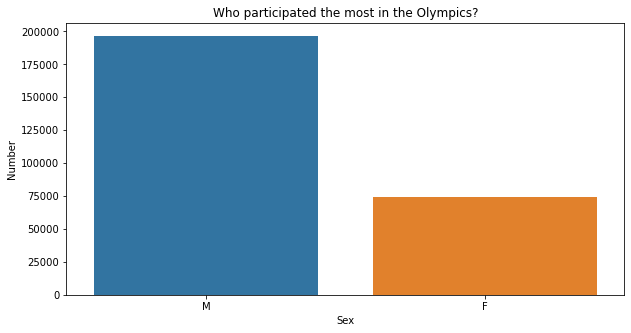

In [17]:
fig= plt.figure(figsize= [10,5])

sns.countplot(x='Sex',data= athlete_events) 
plt.title('Who participated the most in the Olympics?')
plt.xlabel('Sex')
plt.ylabel('Number')
plt.show()

## we conclude from this plot that males participates the most in the olympics


## Who participates the most in each sport?

In [18]:
men_sport_count=np.ones(len(sports))
female_sport_count=np.ones(len(sports))
def sportGenderCount(sex):
    for i in range(0,len(sports)):
        if(sex=='M'):
            men_sport_count[i]=athlete_events[(athlete_events['Sport']==sports[i])&(athlete_events['Sex']==sex)].count()['Sport']
        else:
            female_sport_count[i]=athlete_events[(athlete_events['Sport']==sports[i])&(athlete_events['Sex']==sex)].count()['Sport']
            
sportGenderCount('M')
sportGenderCount('F')        

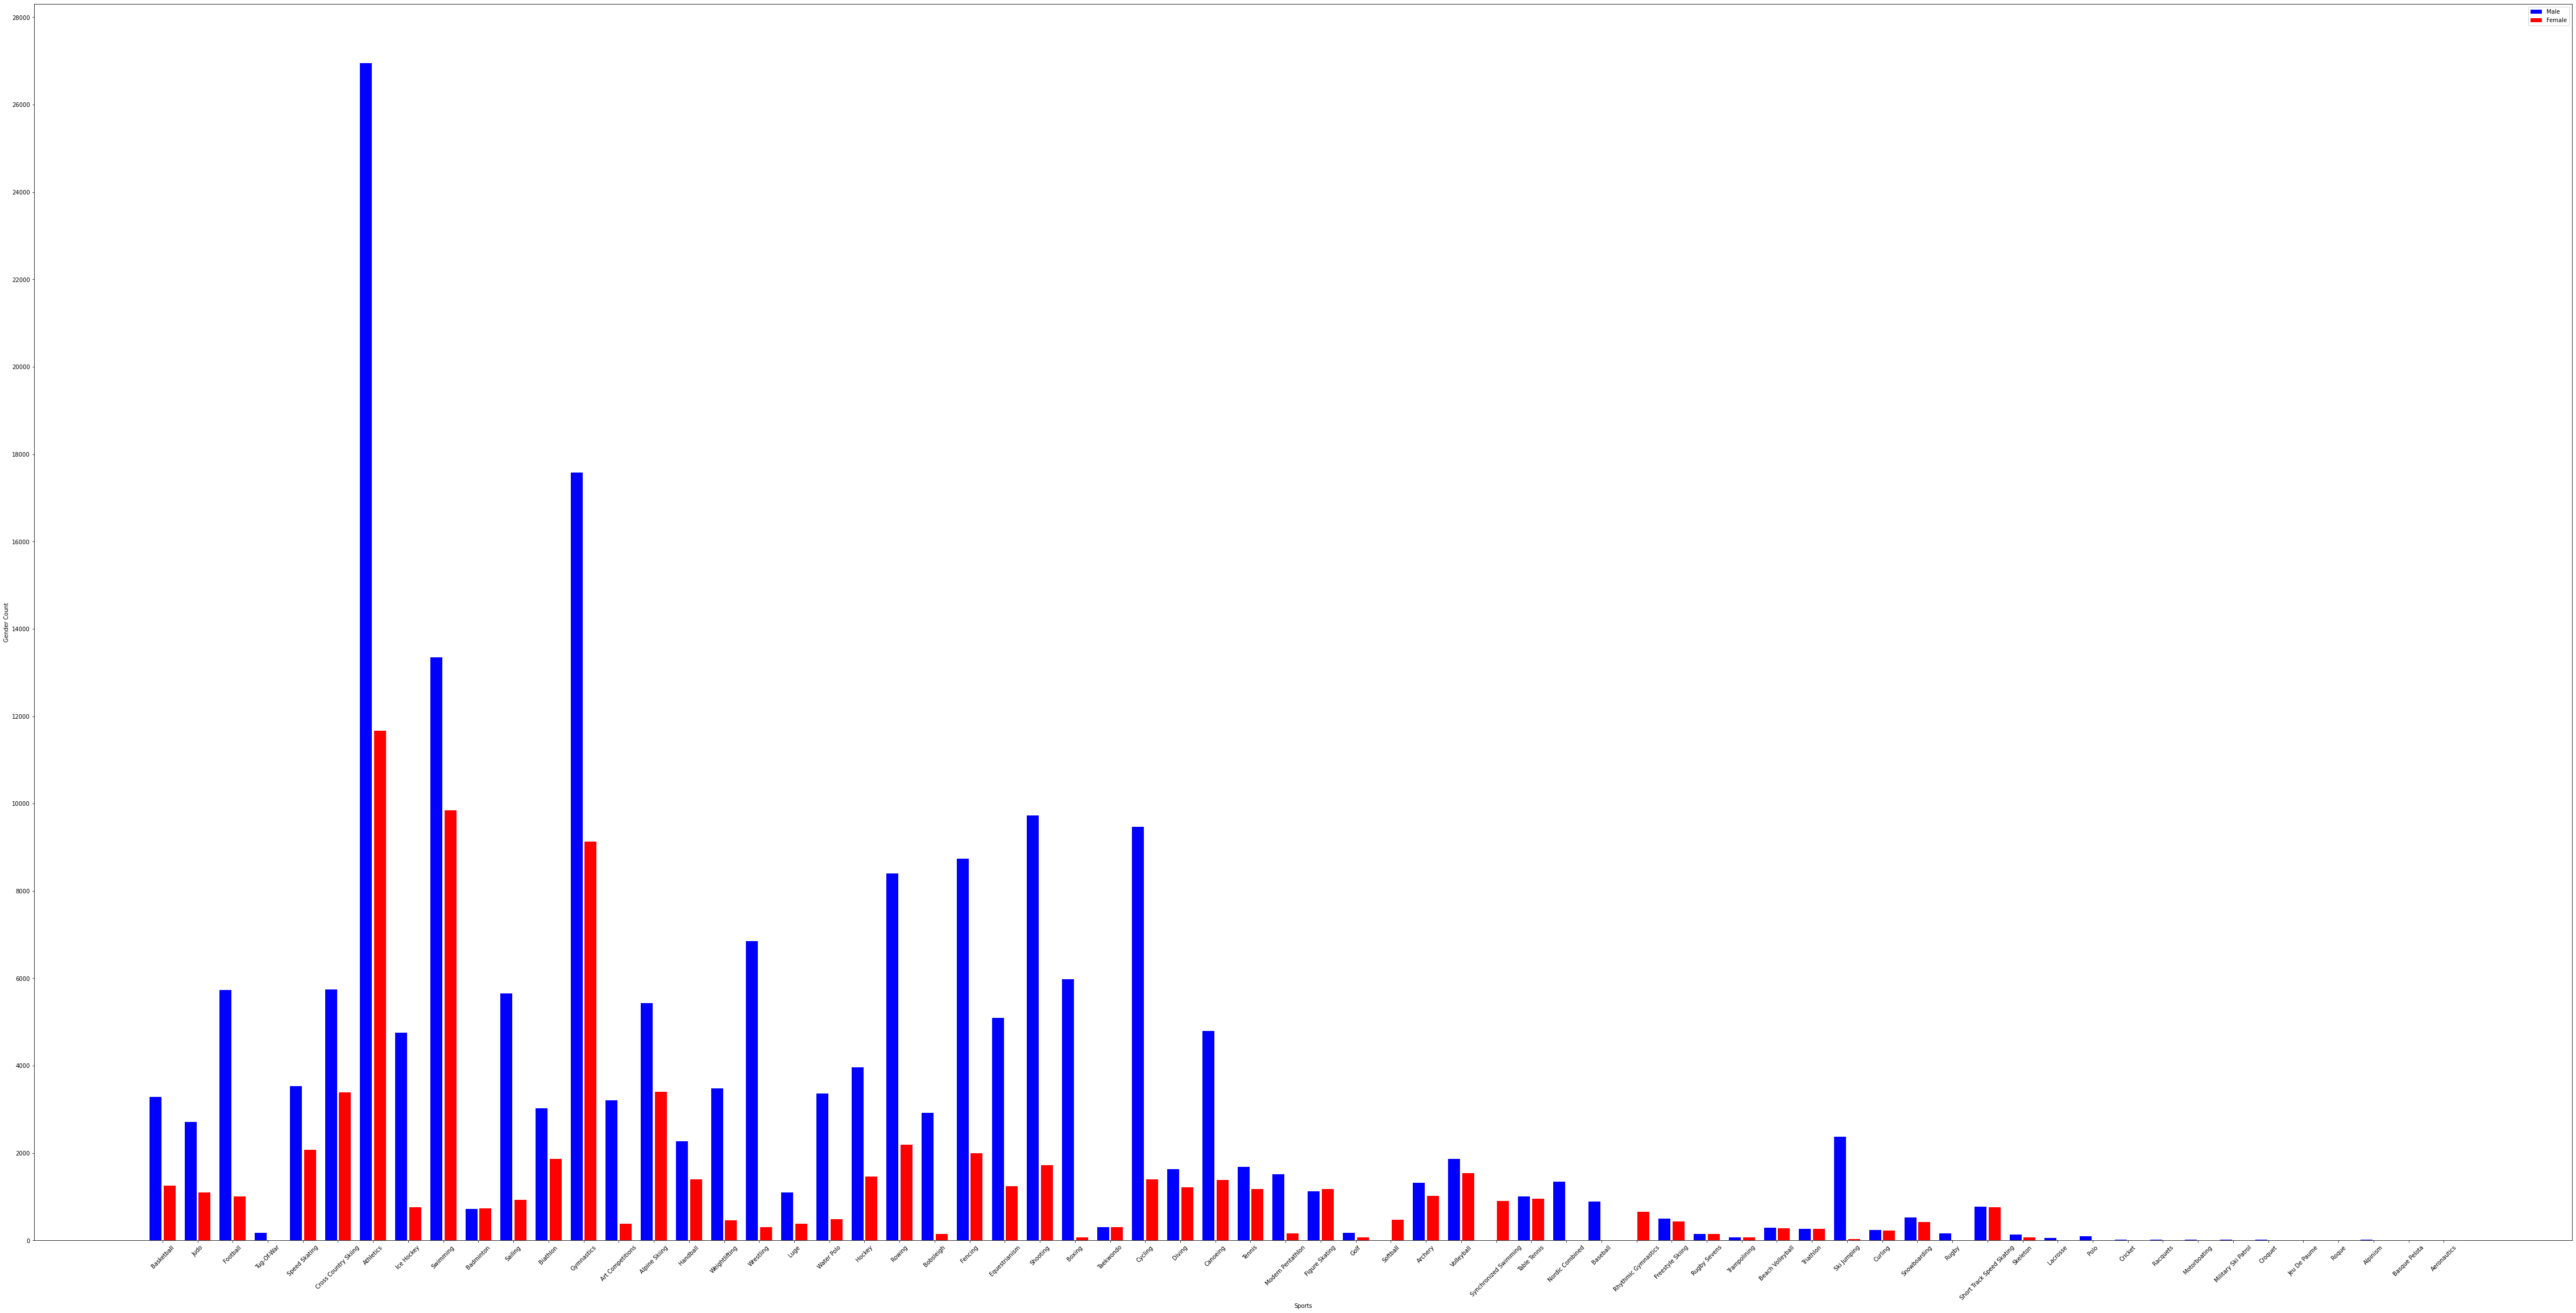

In [19]:
fig, ax = plt.subplots(figsize=(80,40))
x = np.arange(len(sports))
width = 0.34 

plt.bar(x-0.2, men_sport_count, width, color='Blue')
plt.bar(x+0.2, female_sport_count, width, color='Red')

plt.yticks(np.arange(0,30000 , step=2000)) 
plt.xticks(x, sports,rotation=45)
plt.xlabel("Sports")
plt.ylabel("Gender Count")
plt.legend(["Male", "Female"])


plt.show()

#another solution

#fig, ax = plt.subplots(figsize=(100,40))
#sns.countplot(x='Sport',hue='Sex',data=athlete_events)

## we conclude from this plot that athletics and gymnastics has the most participants

# What is the average age of each sport? 

In [20]:
avg_age_sport=np.ones(len(sports))
for i in range(0,len(sports)):
    avg_age_sport[i]=athlete_events[athlete_events['Sport']==sports[i]].mean()['Age']

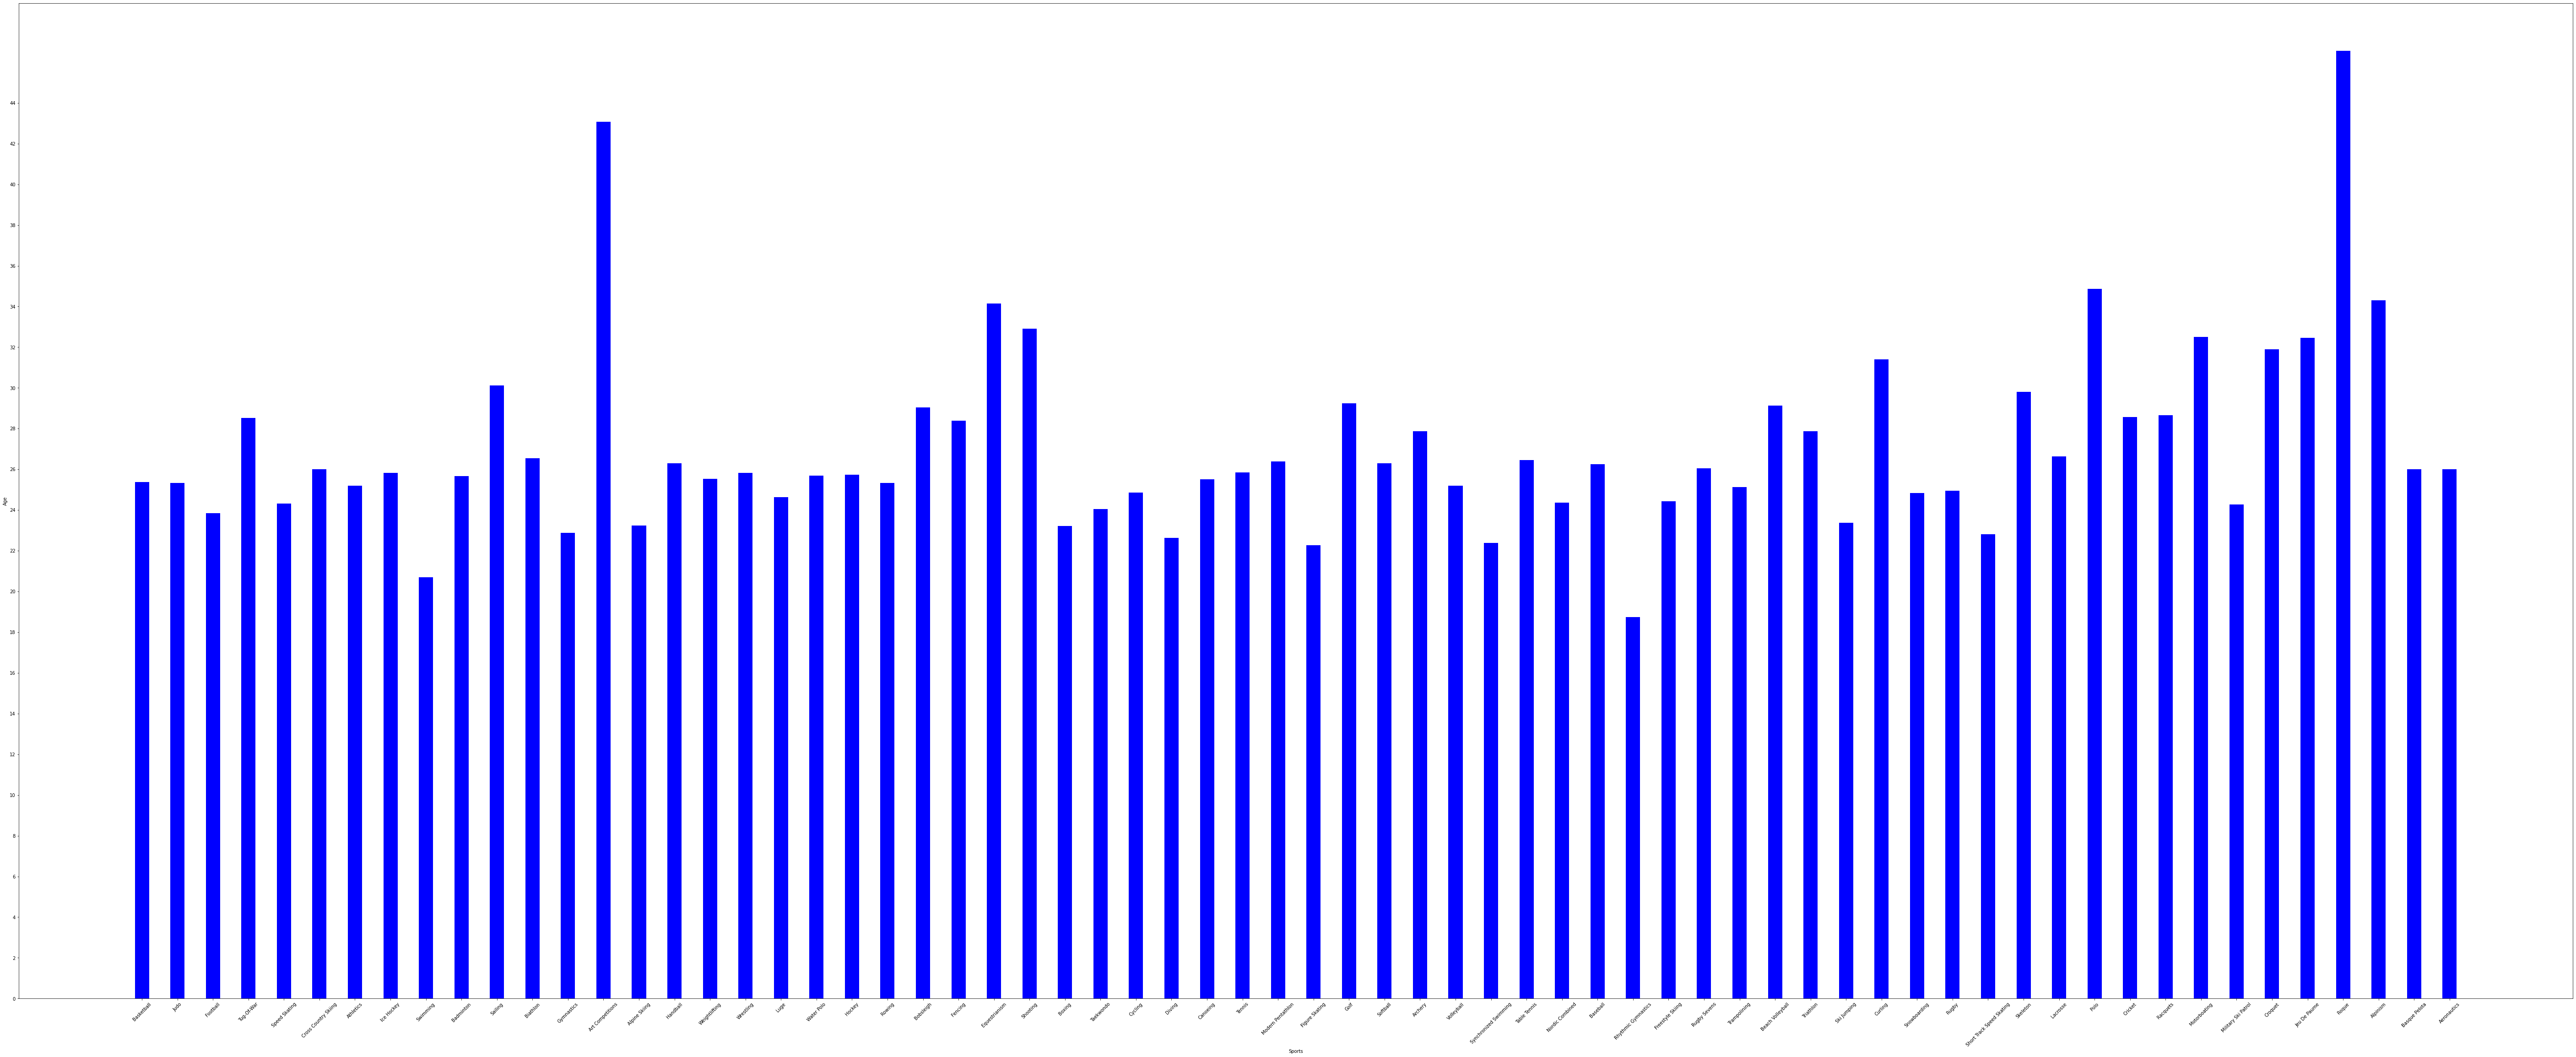

In [21]:
fig, ax = plt.subplots(figsize=(100,40))
x = np.arange(len(sports))
width = 0.4 

plt.bar(x, avg_age_sport, width, color='Blue')

plt.yticks(np.arange(0,46 , step=2)) 
plt.xticks(x, sports,rotation=45)
plt.xlabel("Sports")
plt.ylabel("Age")


plt.show()

## we conclude from this plot that art competitions and roque have the highest average age and rhythmic gymnastics has the lowest average age

# What is the relation between age and medal? 

<AxesSubplot:xlabel='Age', ylabel='count'>

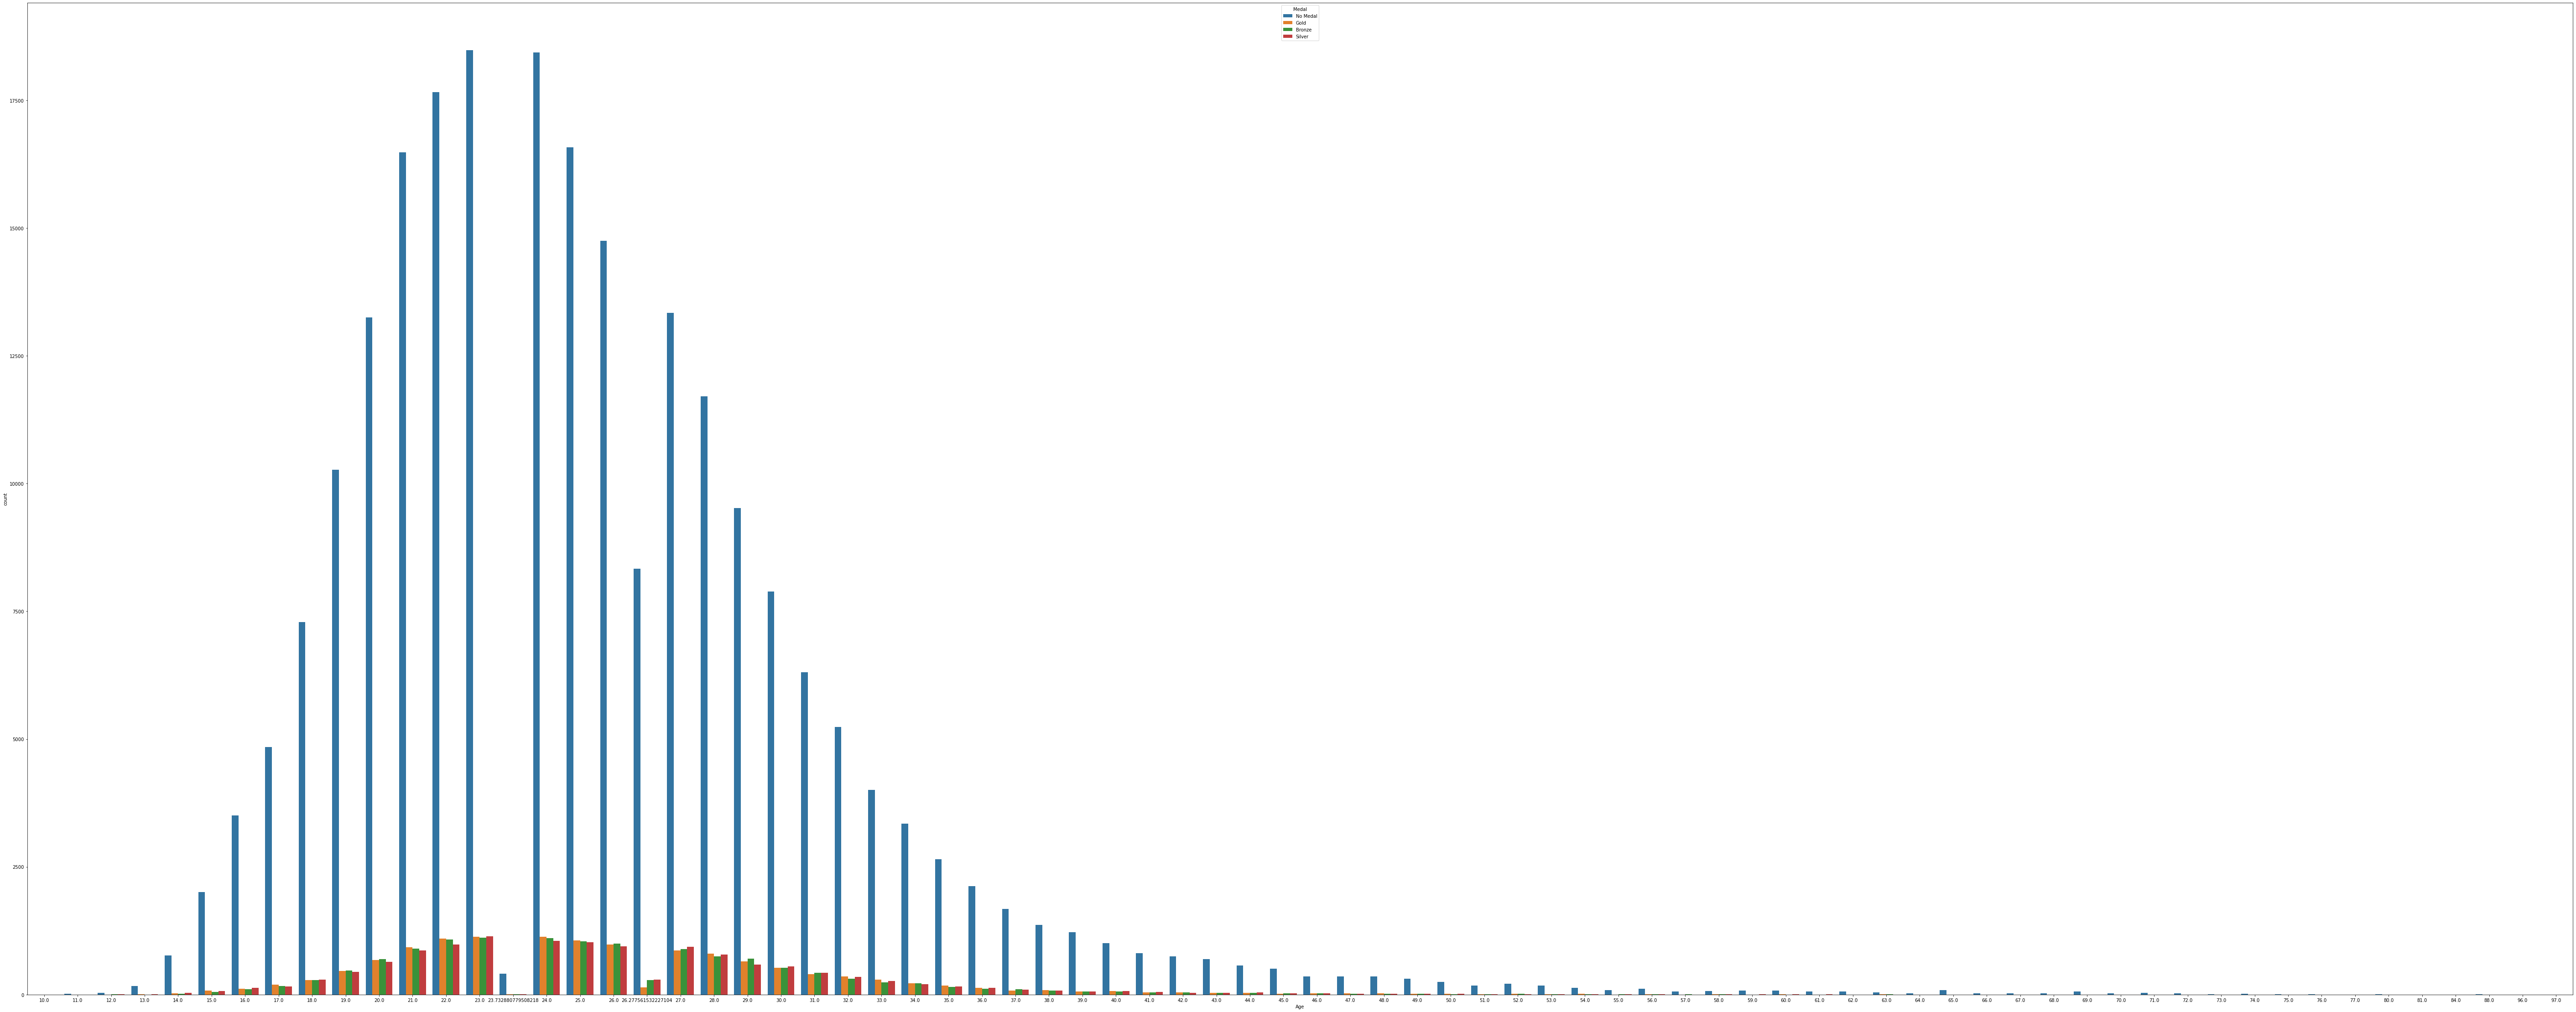

In [22]:
fig, ax = plt.subplots(figsize=(100,40))
 
sns.countplot(x='Age',hue='Medal',data=athlete_events)

## we conclude from this plot that participants with ages 23 and 24 have the highest medals

# What is the average of height for each sport? 

In [23]:
avg_height_sport=np.ones(len(sports))
for i in range(0,len(sports)):
    avg_height_sport[i]=athlete_events[athlete_events['Sport']==sports[i]].mean()['Height']

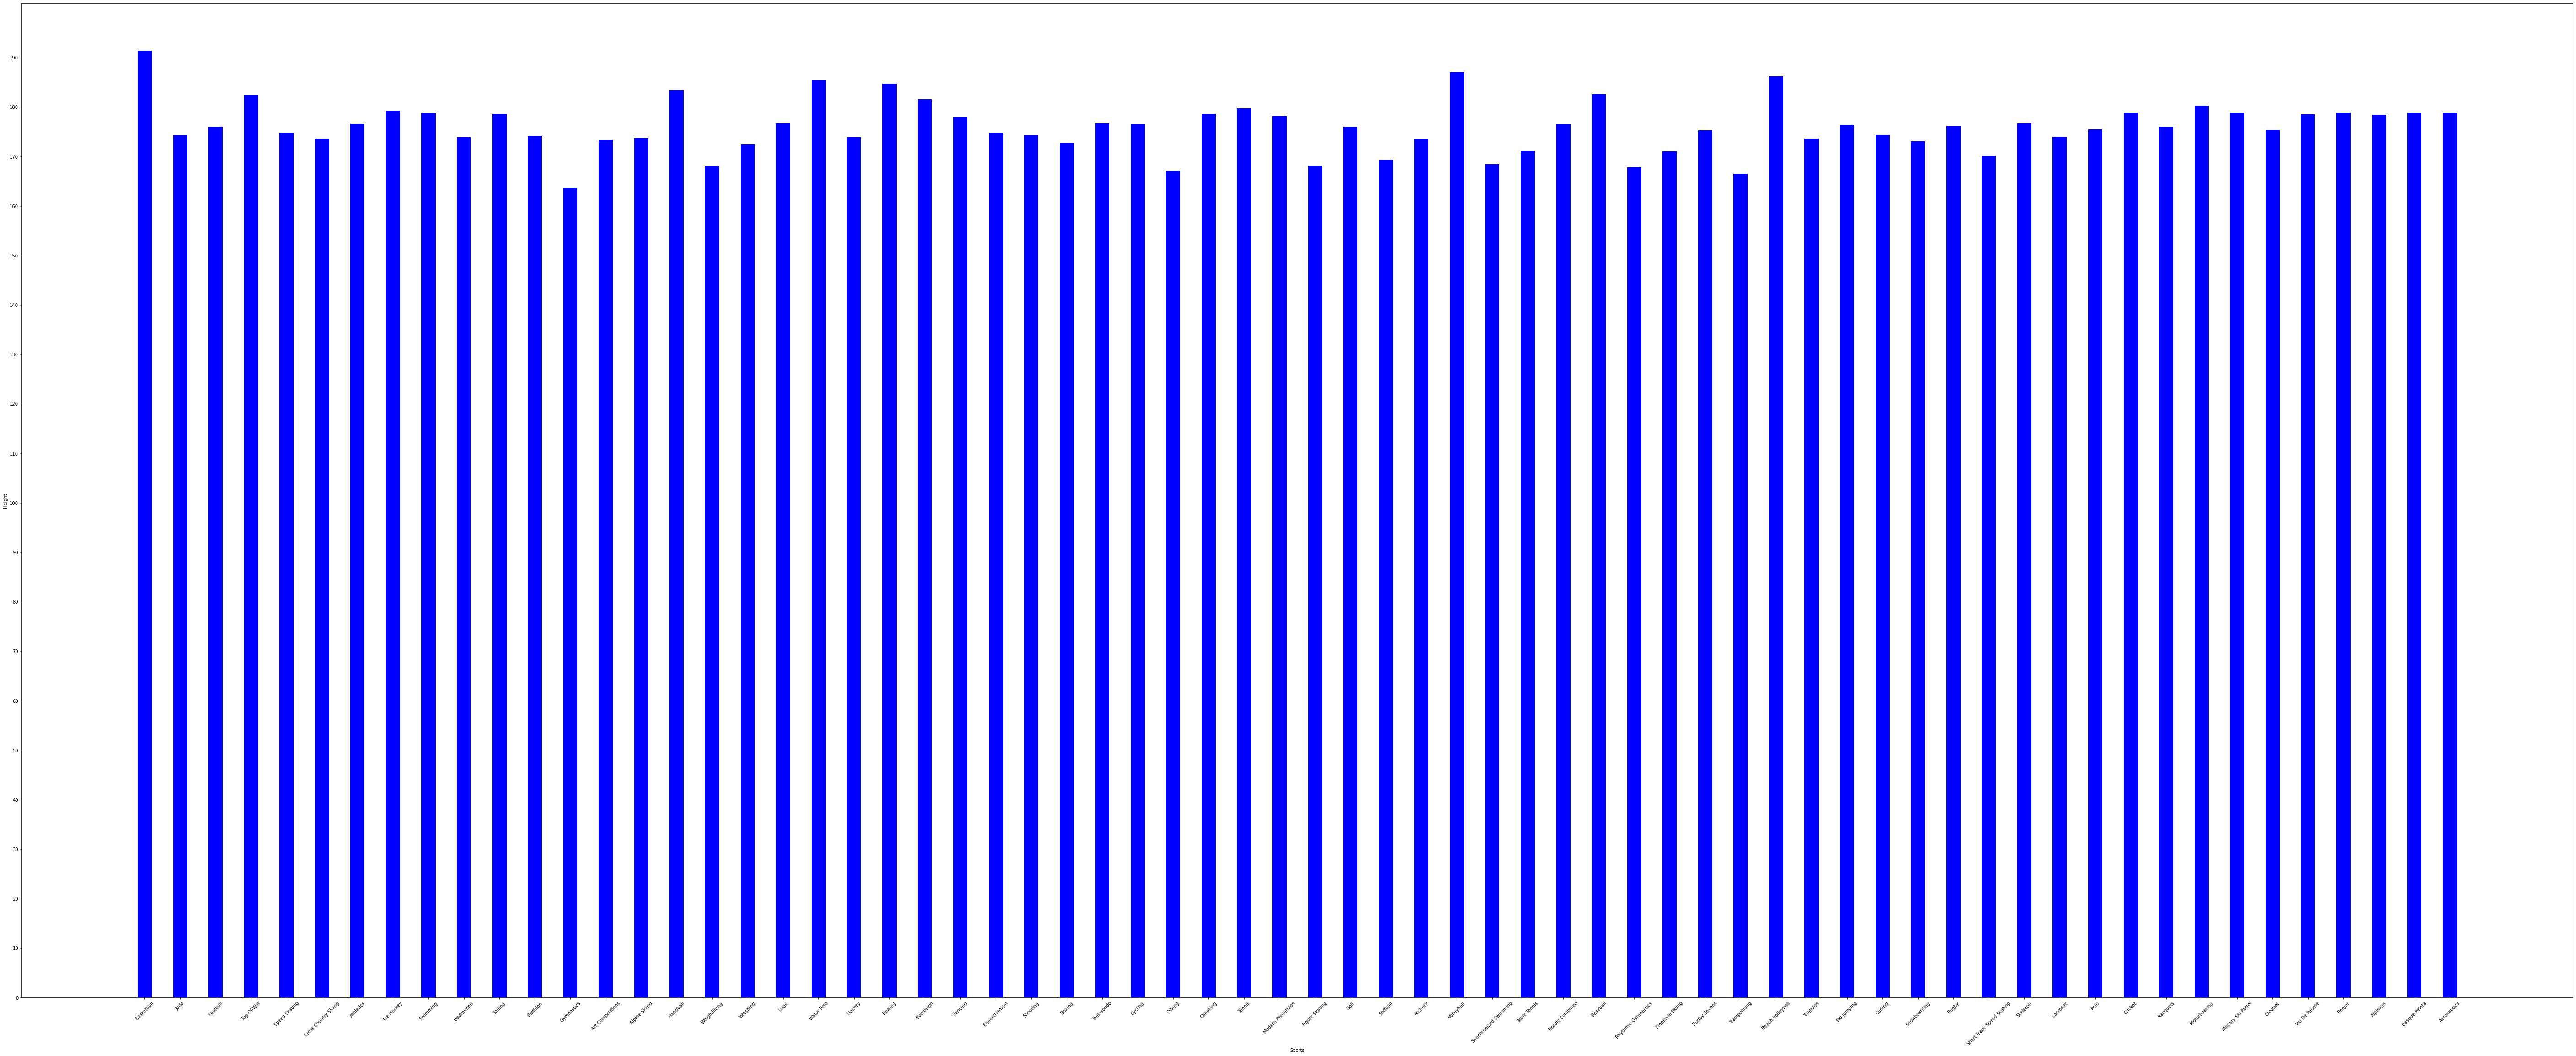

In [24]:
fig, ax = plt.subplots(figsize=(100,40))
x = np.arange(len(sports))
width = 0.4 

plt.bar(x, avg_height_sport, width, color='Blue')

plt.yticks(np.arange(0,200 , step=10)) 
plt.xticks(x, sports,rotation=45)
plt.xlabel("Sports")
plt.ylabel("Height")


plt.show()

## we conclude from this plot that basketball sport has the highest average height

# What is the average of weight for each sport? 

In [25]:
avg_weight_sport=np.ones(len(sports))
for i in range(0,len(sports)):
    avg_weight_sport[i]=athlete_events[athlete_events['Sport']==sports[i]].mean()['Weight']

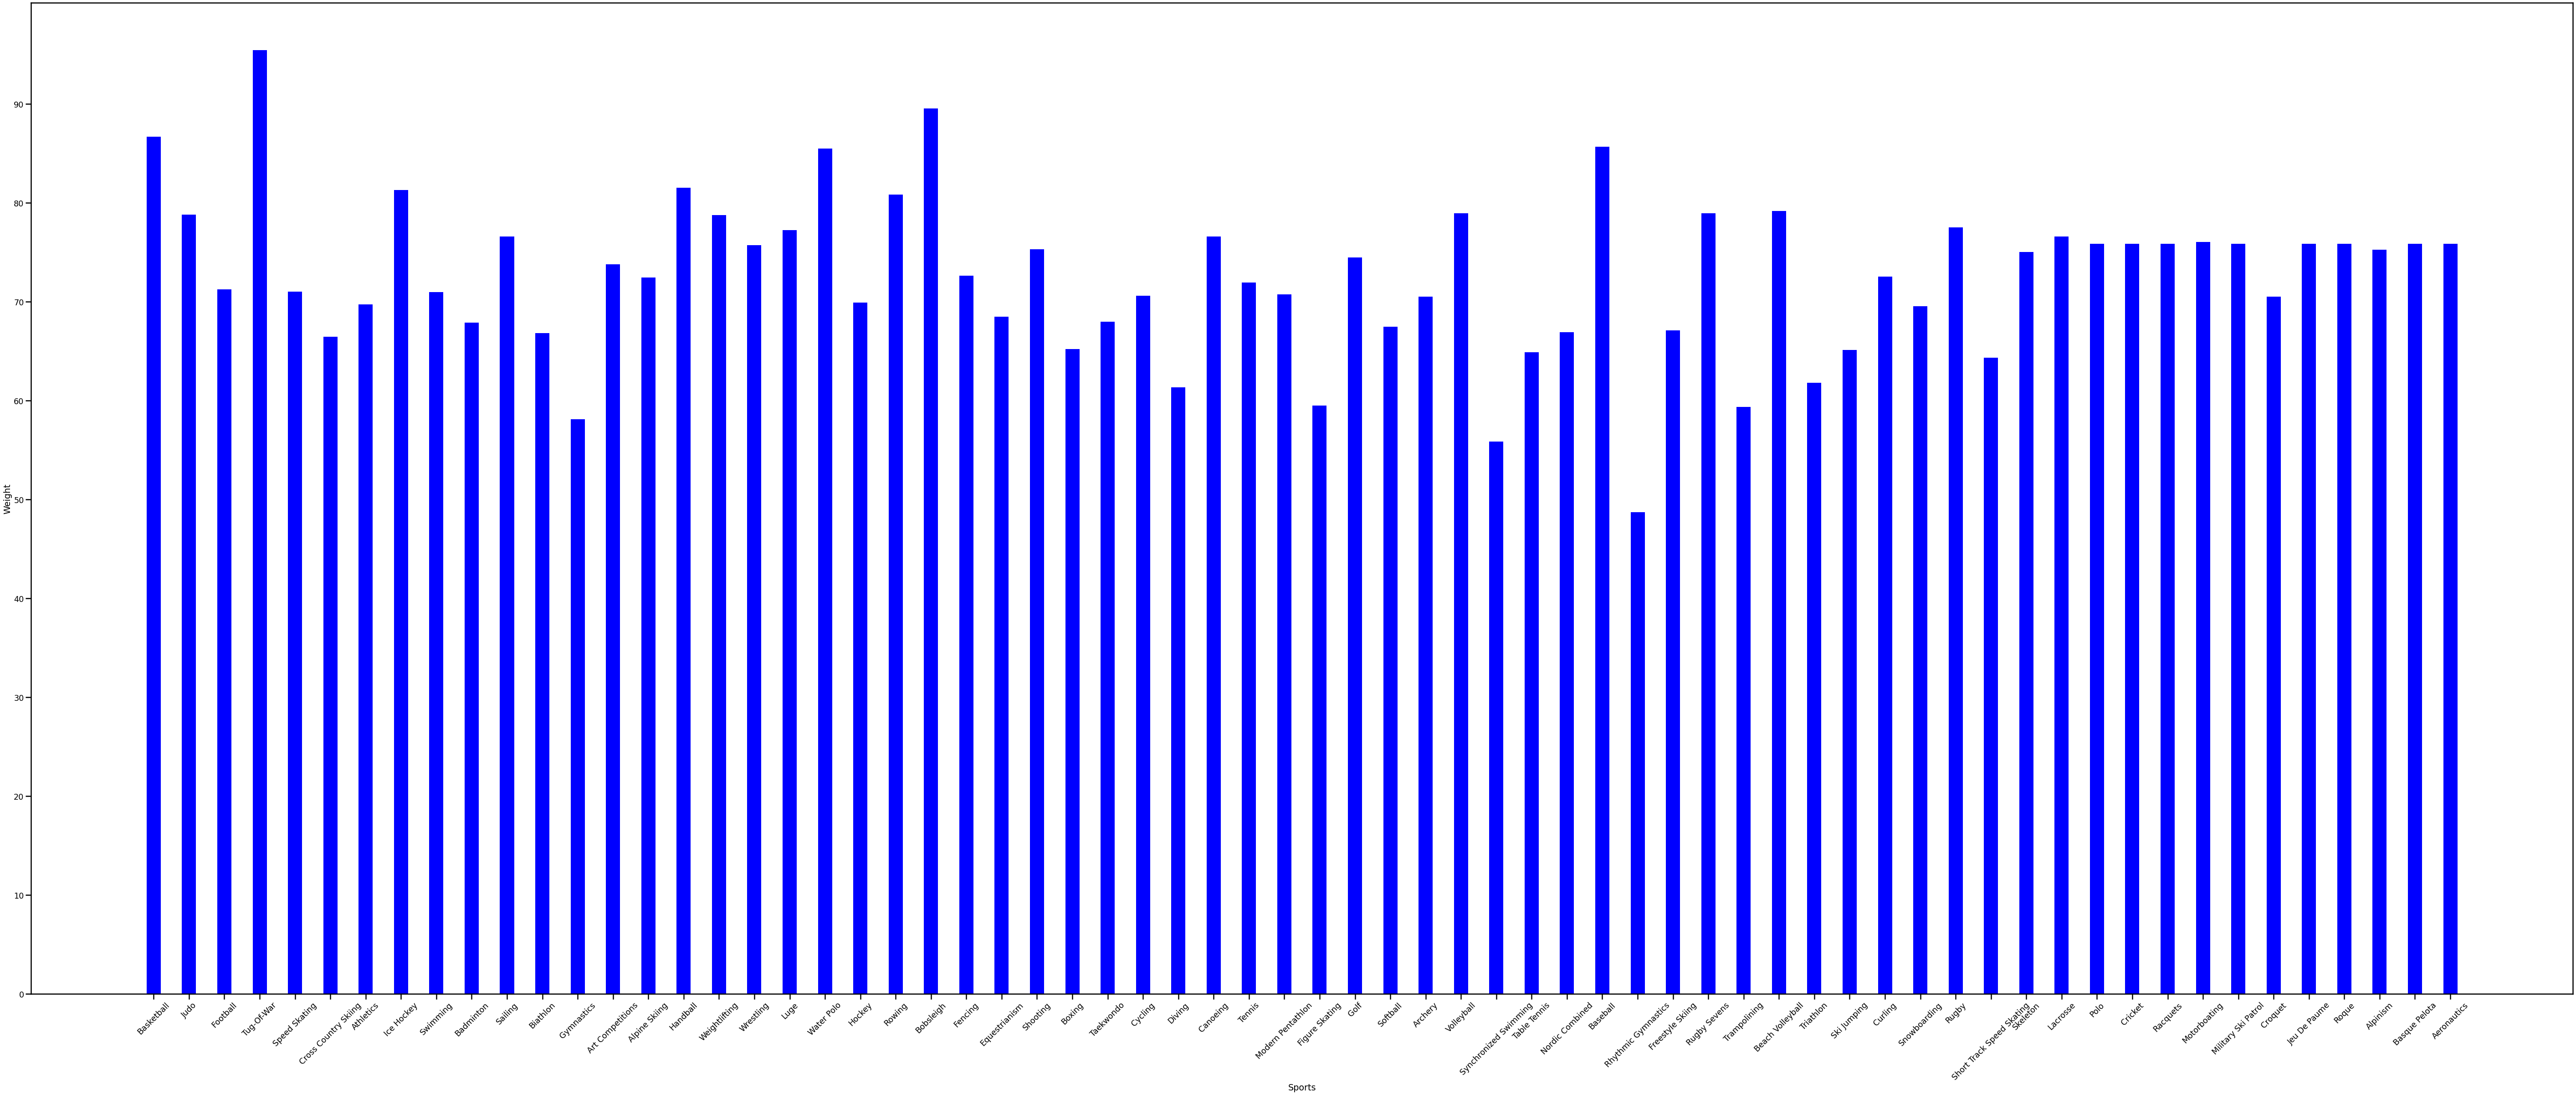

In [26]:
sns.set_context('poster',font_scale=0.8)
fig, ax = plt.subplots(figsize=(100,40))
x = np.arange(len(sports))
width = 0.4 

plt.bar(x, avg_weight_sport, width, color='Blue')

plt.yticks(np.arange(0,100 , step=10)) 
plt.xticks(x, sports,rotation=45)
plt.xlabel("Sports")
plt.ylabel("Weight")


plt.show()

## we conclude from this plot that tug of war has the highest average weight and rhythmic gymnastics has the lowest average weight

# What is the relation between the team and the season? 

<AxesSubplot:xlabel='NOC', ylabel='count'>

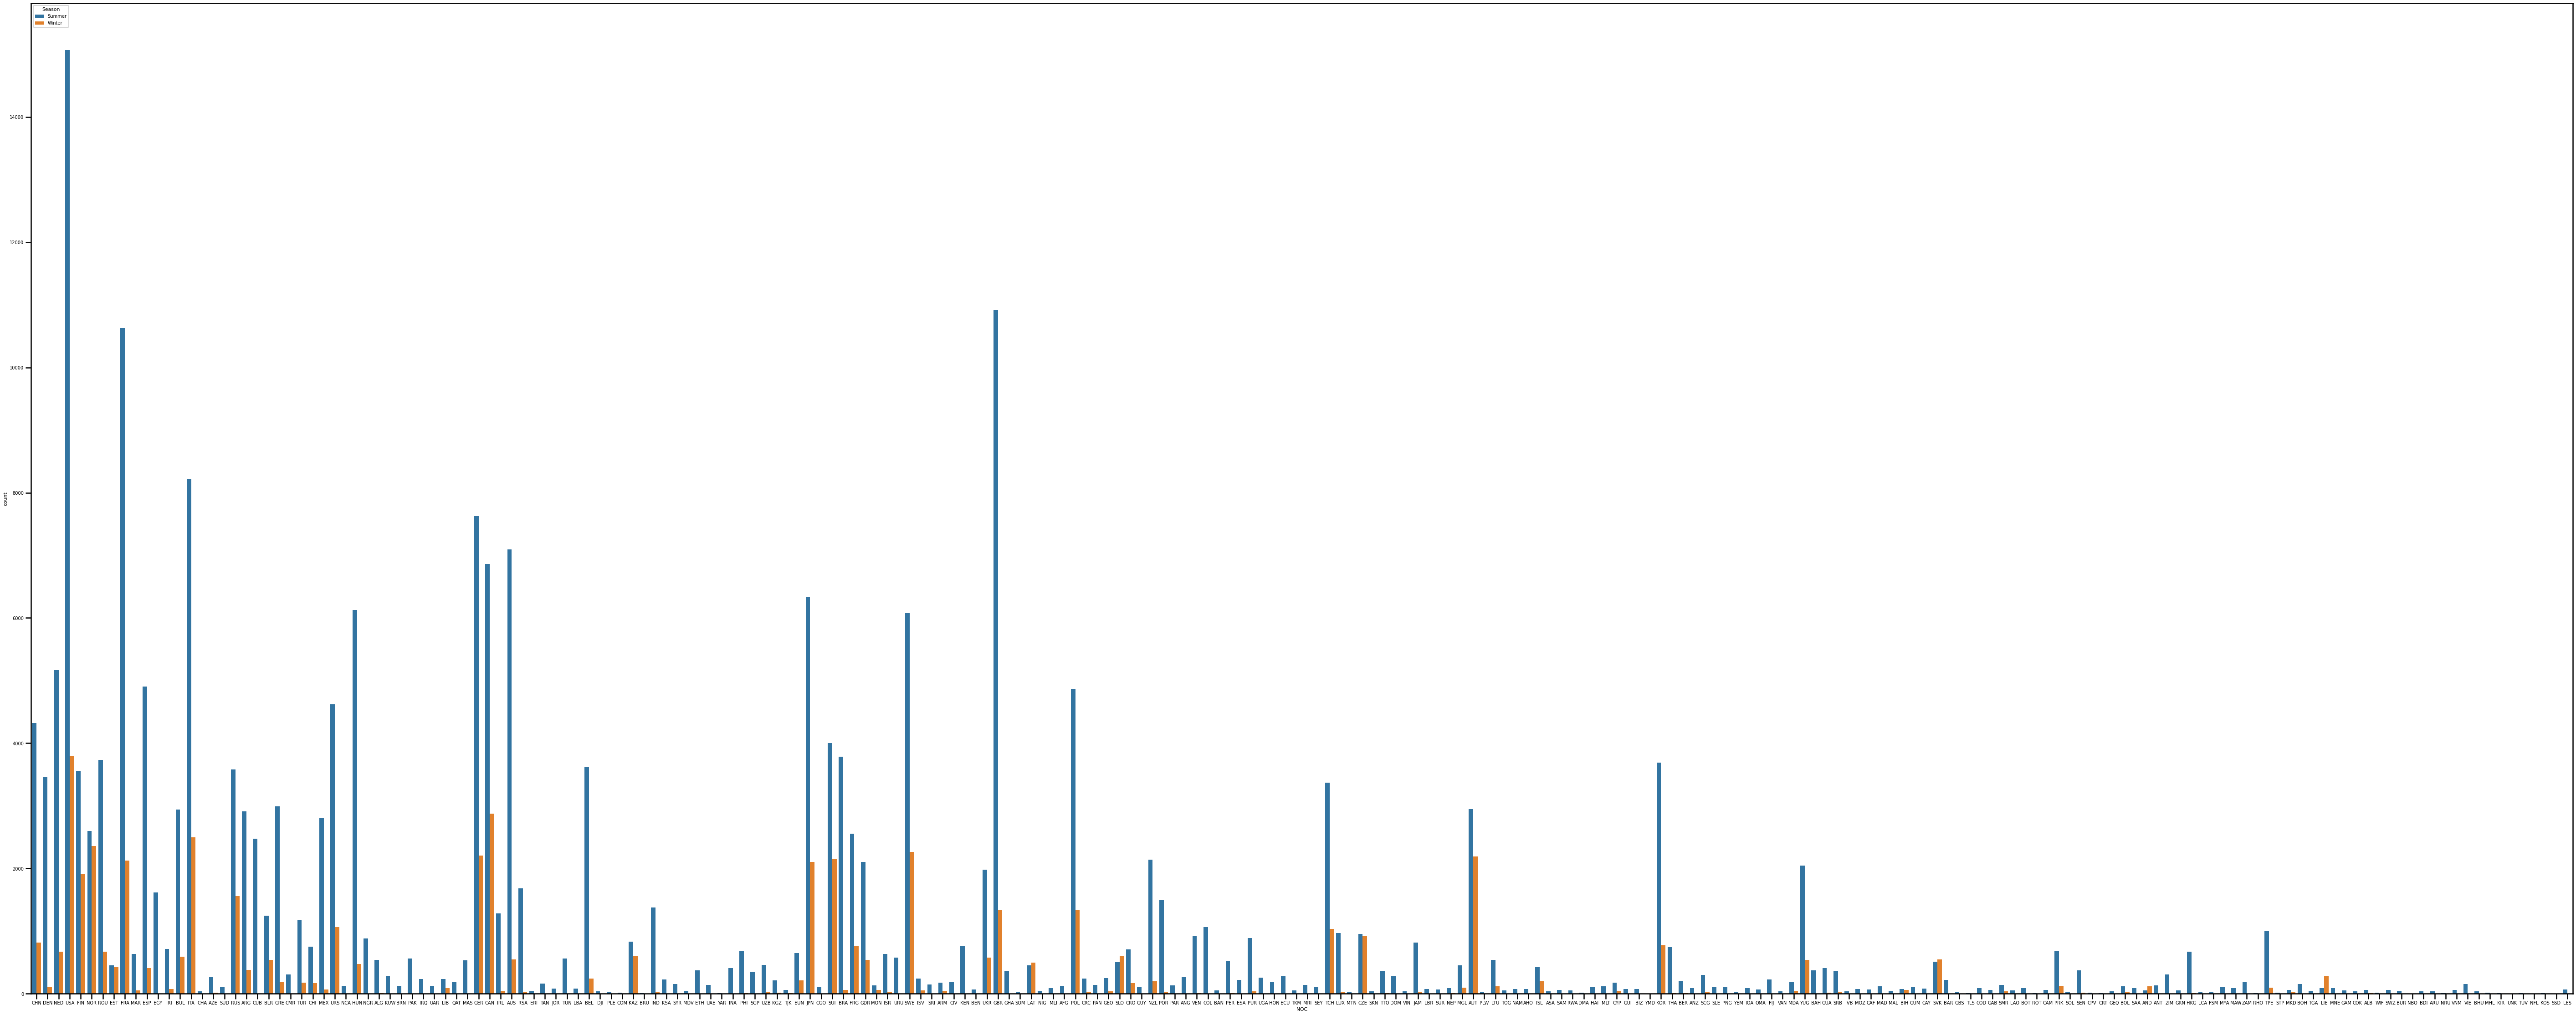

In [27]:
sns.set_context('poster',font_scale=0.45)
fig, ax = plt.subplots(figsize=(100,40))

sns.countplot(x='NOC',hue='Season',data=athlete_events)

## we conclude from this plot that USA is the most country that participates in both summer and winter

# What is the relation between the team and medal?

<AxesSubplot:xlabel='NOC', ylabel='count'>

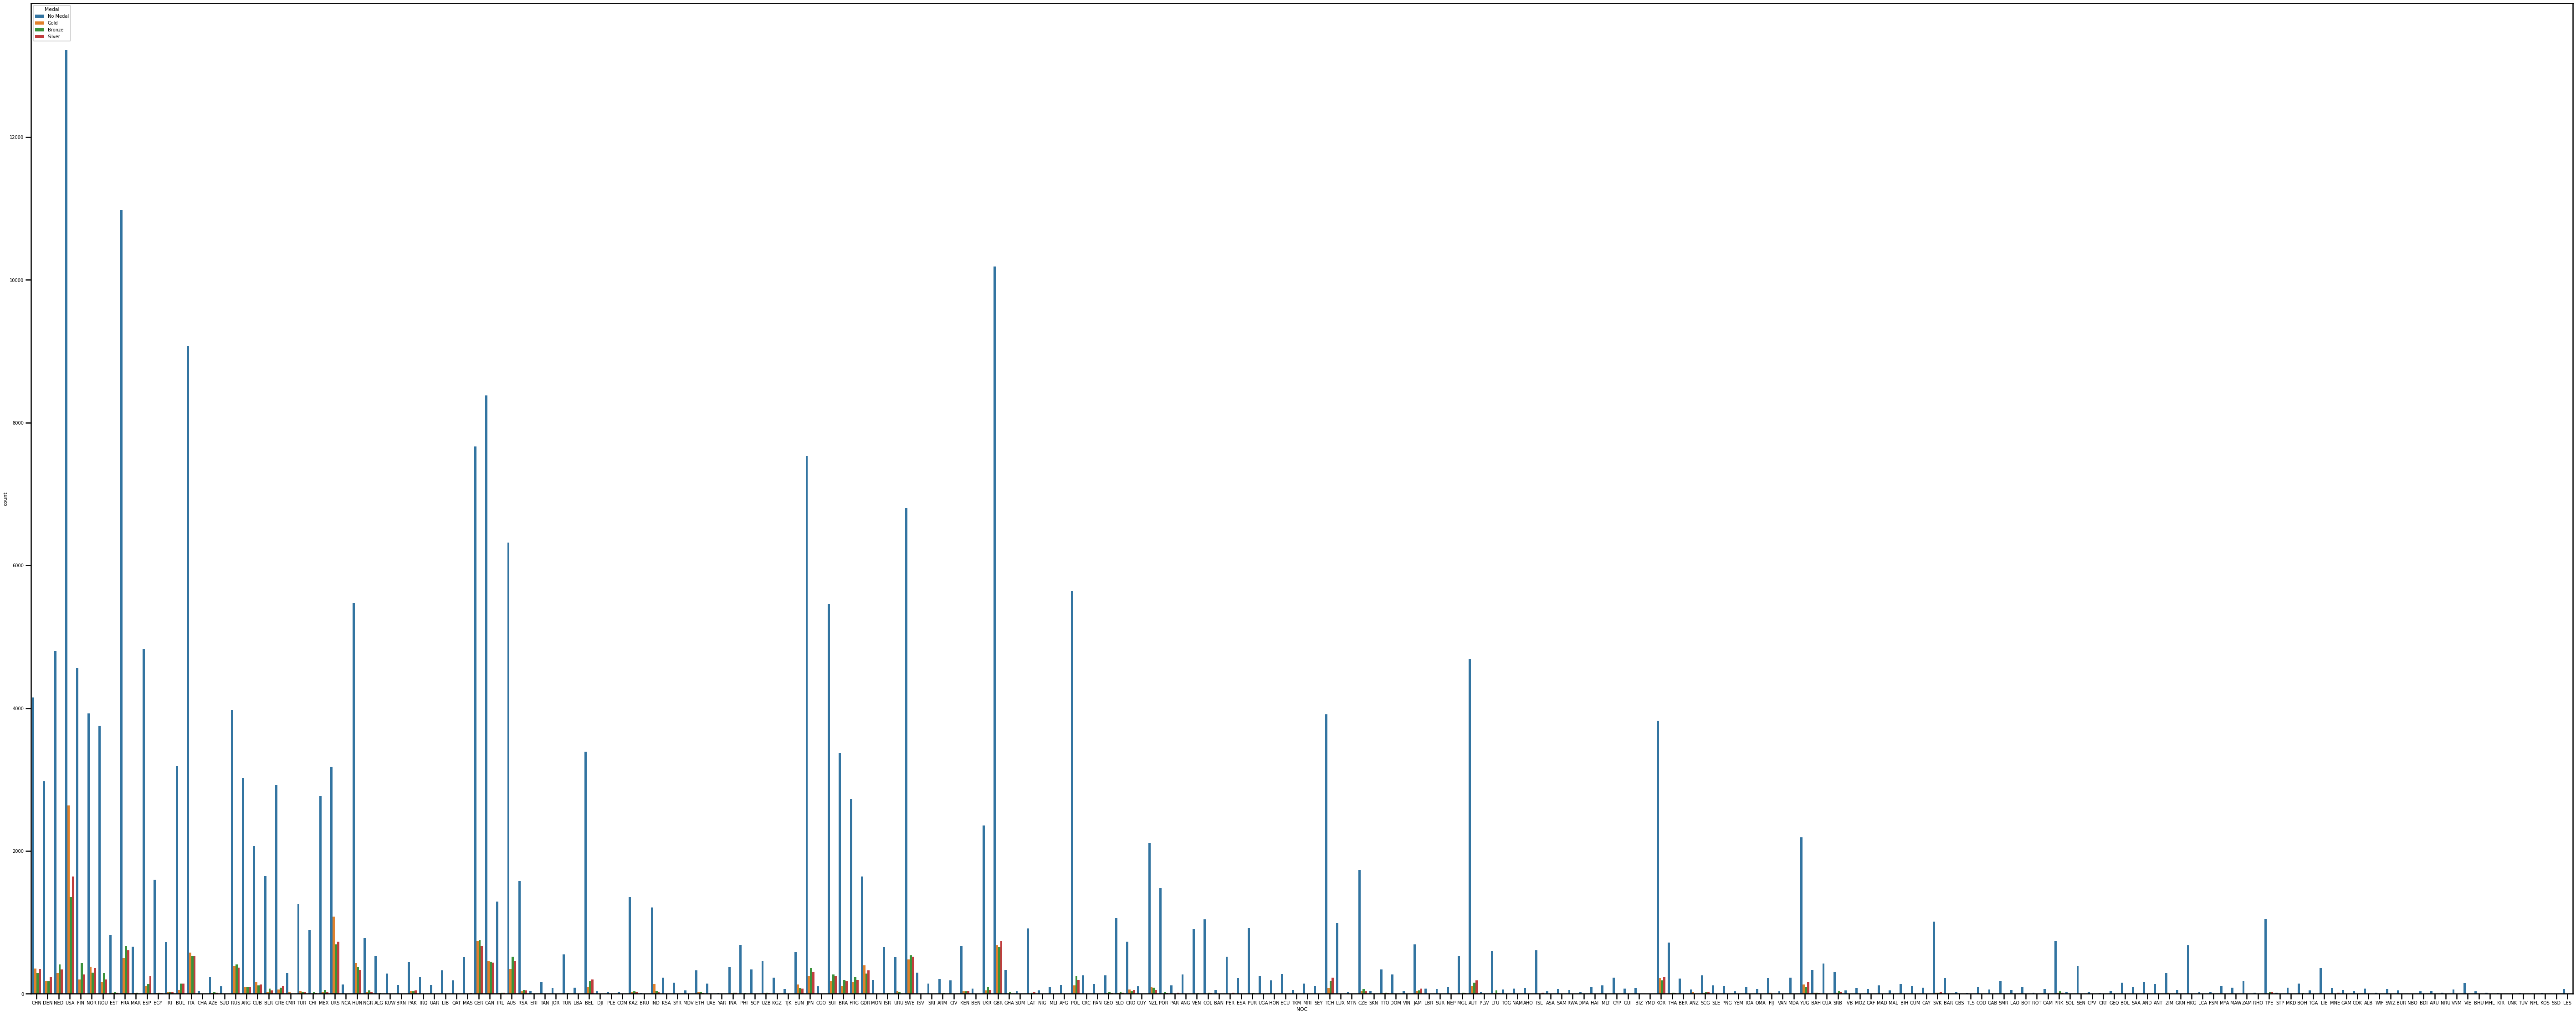

In [28]:
fig, ax = plt.subplots(figsize=(100,40))
 
sns.countplot(x='NOC',hue='Medal',data=athlete_events)

## we conclude from this plot that USA is the most country that won gold ,silver and bronze medals

# What is the relations between the season and the city

<AxesSubplot:xlabel='City', ylabel='count'>

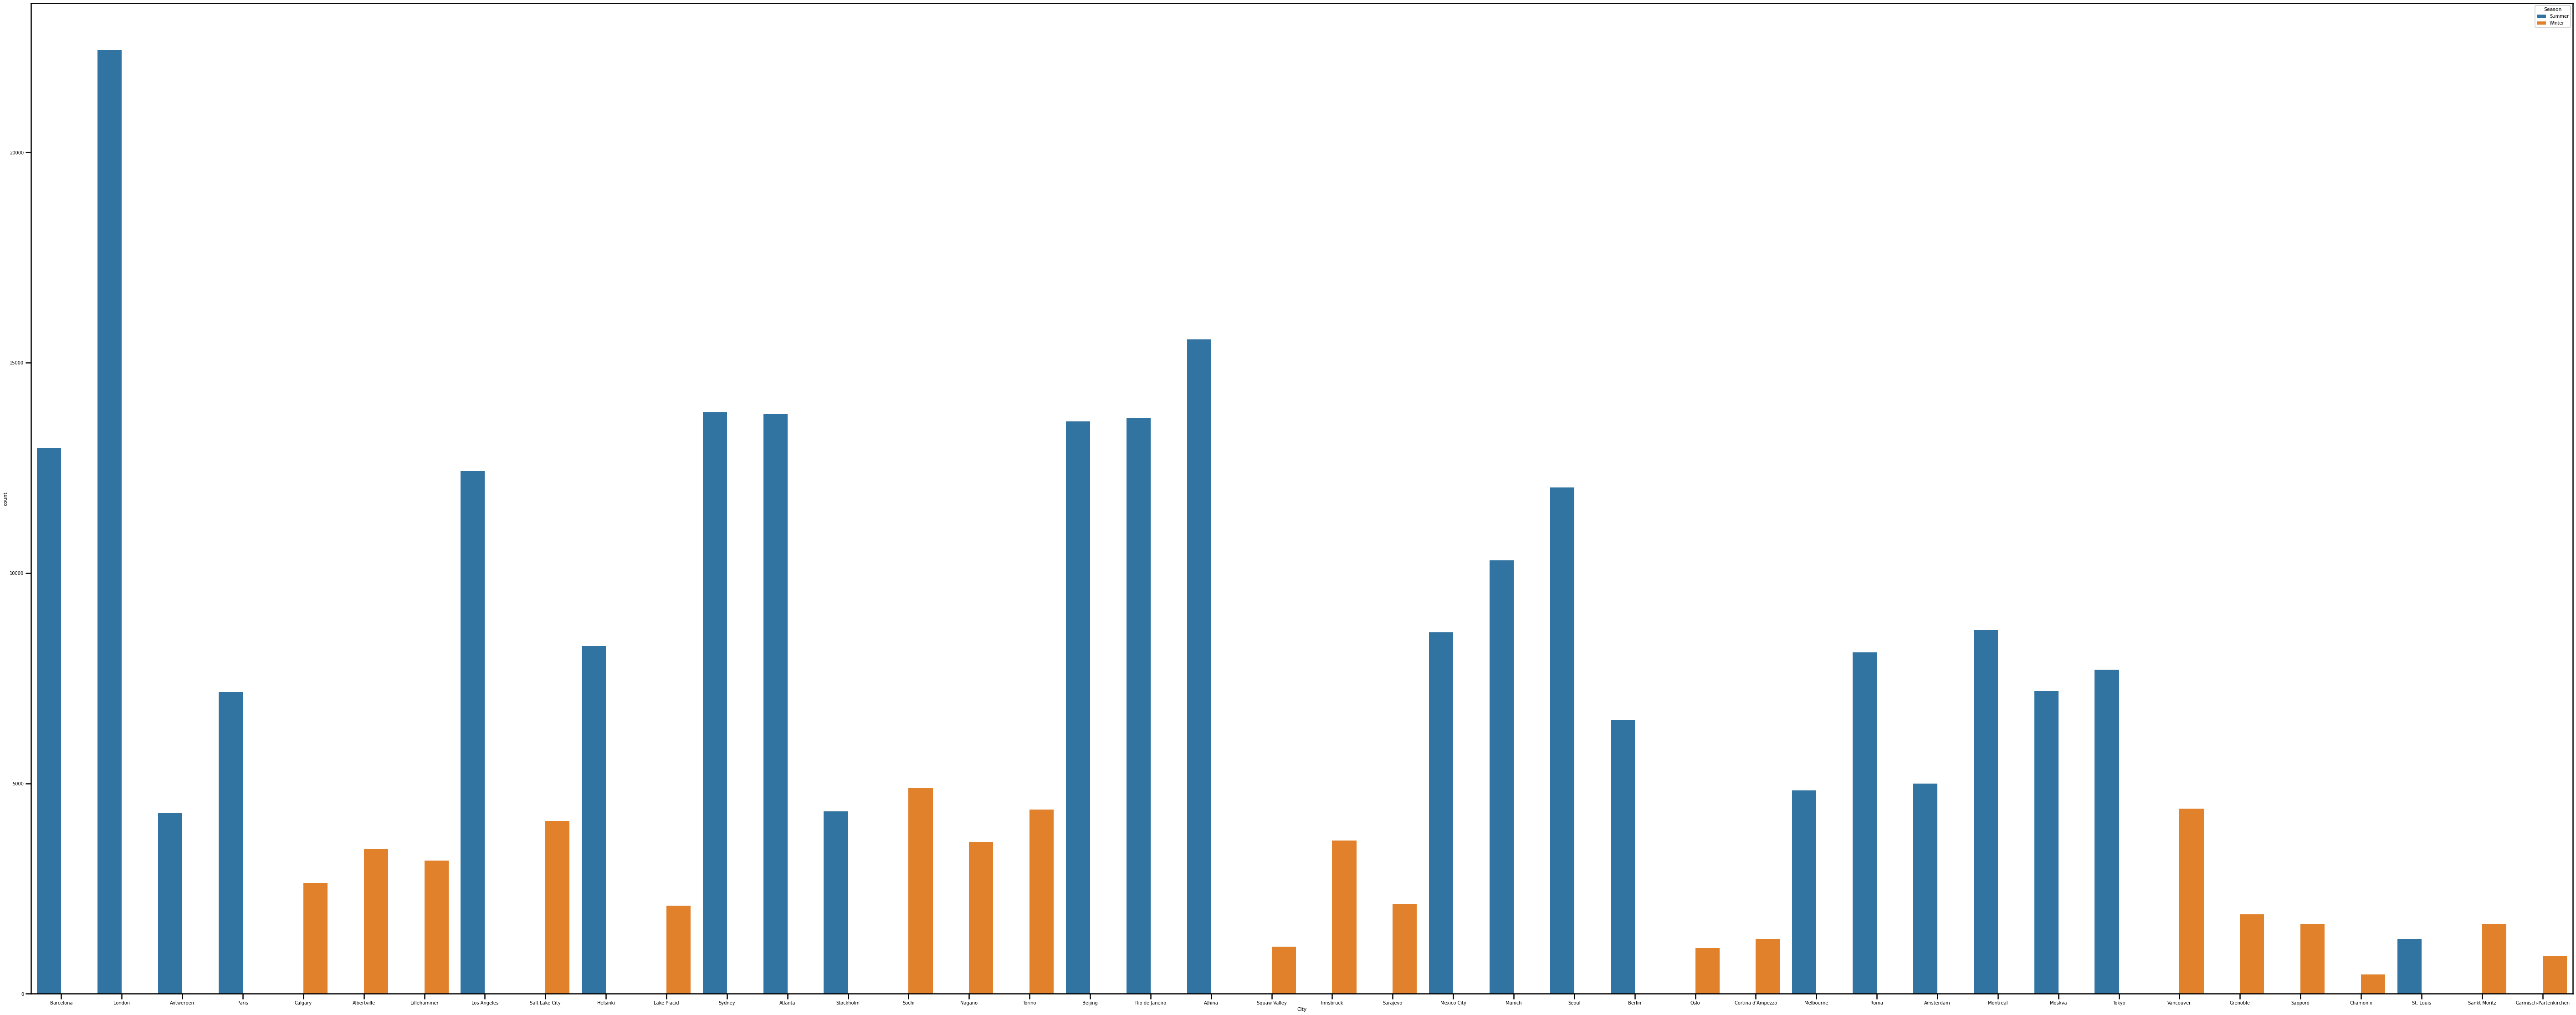

In [29]:
fig, ax = plt.subplots(figsize=(100,40))

sns.countplot(x='City',hue='Season',data=athlete_events)

## we conclude from this plot that in summer London has hosted the most olympics and in winter sochi has hosted the most olympics

# What is the relation between the season and the sport? 

<AxesSubplot:xlabel='Sport', ylabel='count'>

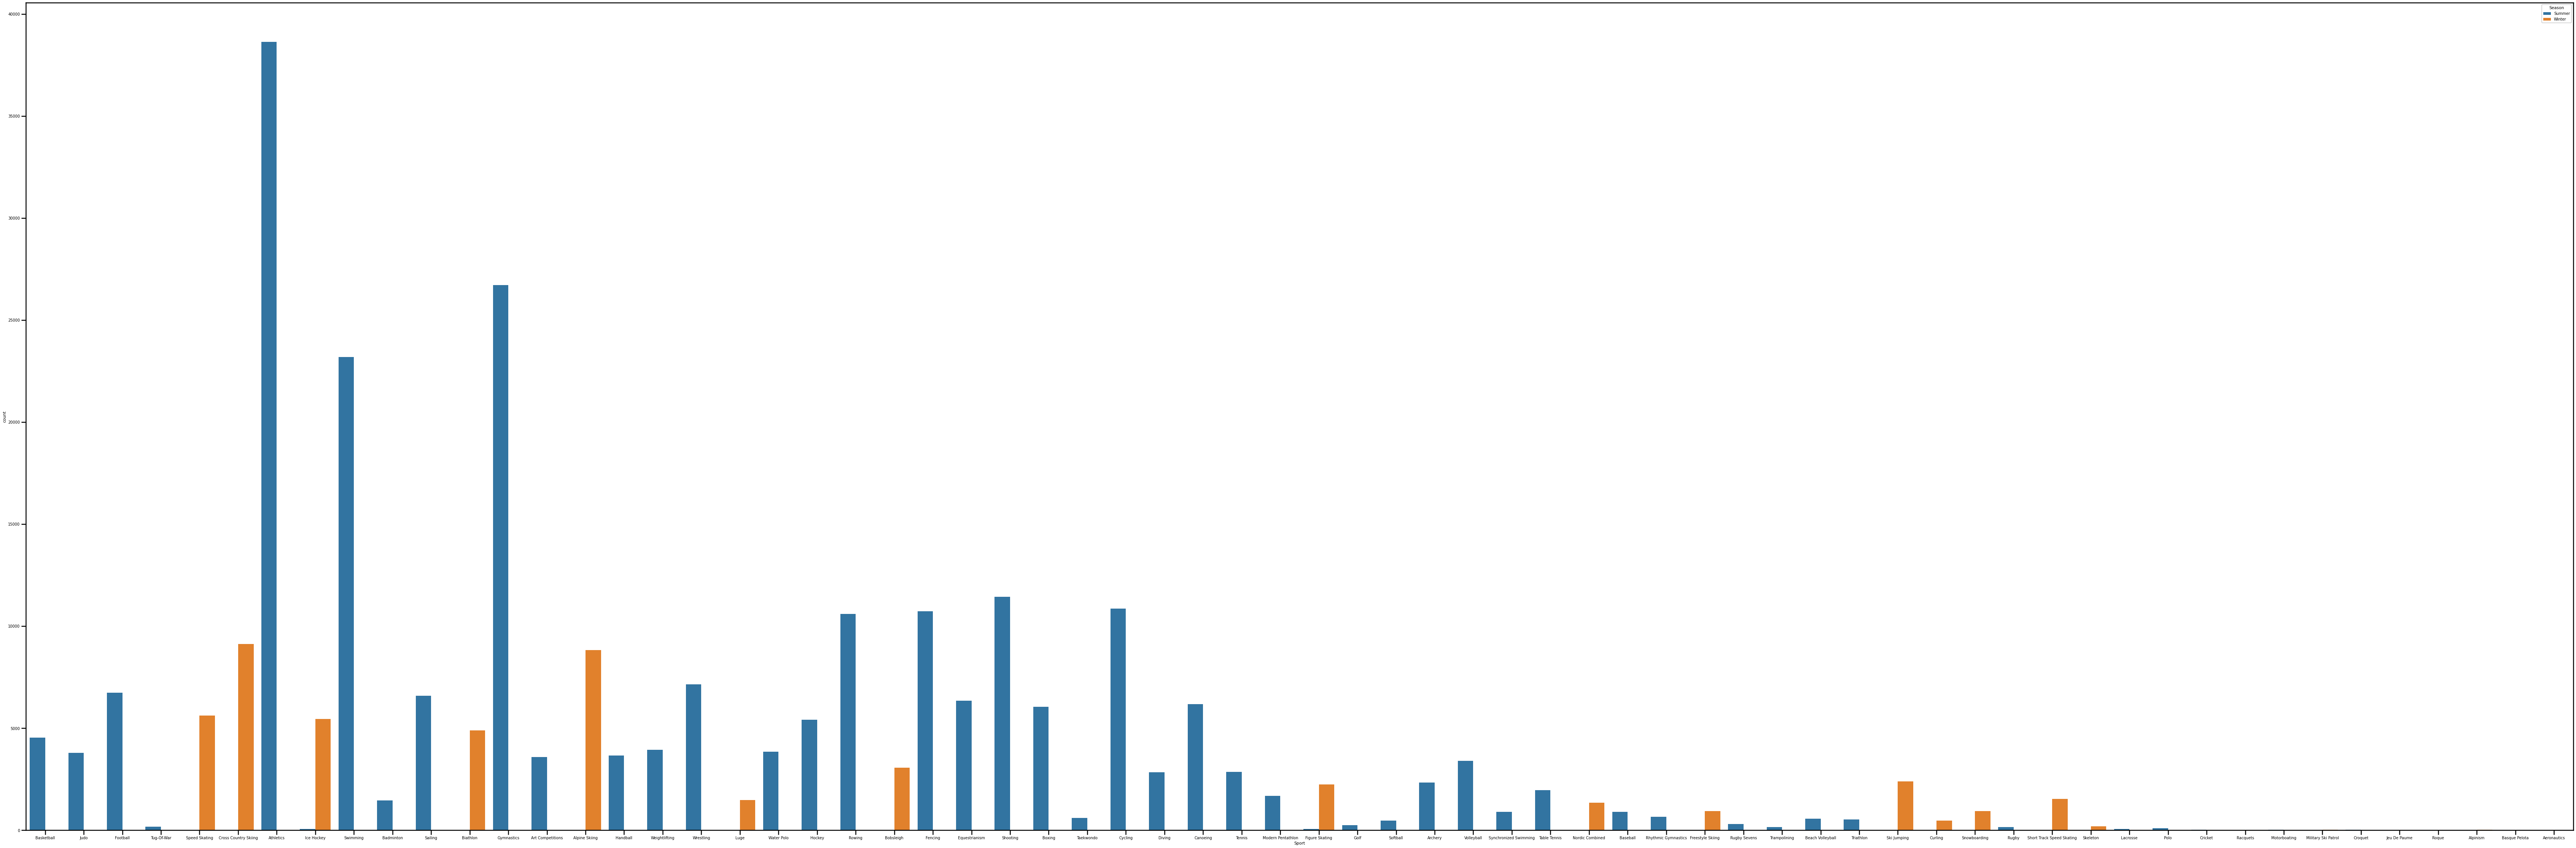

In [30]:
fig, ax = plt.subplots(figsize=(120,40))

sns.countplot(x='Sport',hue='Season',data=athlete_events)

## we conclude from this plot that athletics is the most sport played in summer and cross country skiing is the most sport played in winter

# What is the relation between event and height? 

In [31]:
avg_height_event=np.ones(len(events))
for i in range(0,len(events)):
    avg_height_event[i]=athlete_events[athlete_events['Event']==events[i]].mean()['Height']

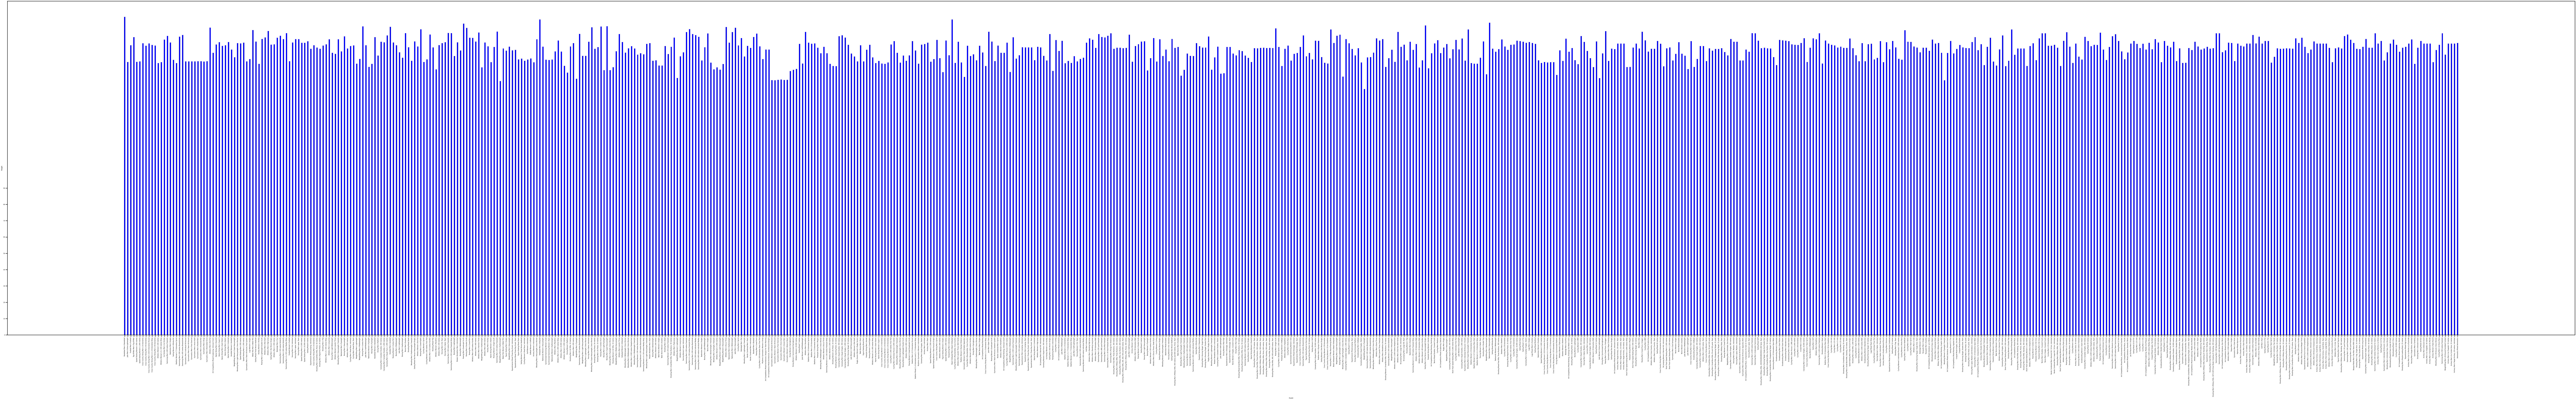

In [32]:
sns.set_context('poster',font_scale=0.4)
fig, ax = plt.subplots(figsize=(300,40))
x = np.arange(len(events))
width = 0.4 

plt.bar(x, avg_height_event, width, color='Blue')

plt.yticks(np.arange(0,100 , step=10)) 
plt.xticks(x, events,rotation=90)
plt.xlabel("Event")
plt.ylabel("Height")


plt.show()

## Who are to top 10 Men and Females that won medals in the olympics?

In [33]:
male=athlete_events[athlete_events['Sex']=='M']
female=athlete_events[athlete_events['Sex']=='F']

In [34]:
top10M=male.groupby('Name').count()['Medal'].sort_values(ascending=False).head(10)
top10F=female.groupby('Name').count()['Medal'].sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='Name'>

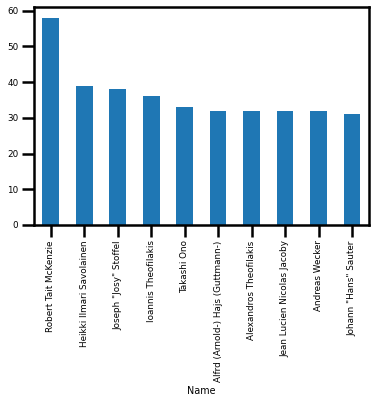

In [35]:
top10M.plot(kind='bar')

## we conclude from this plot that Robert Tait Mckenzie won the most medals among male participants

<AxesSubplot:xlabel='Name'>

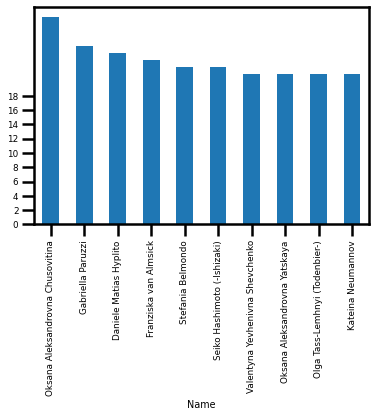

In [36]:
y_ticks = np.arange(0, 20, 2)
plt.yticks(y_ticks)
top10F.plot(kind='bar')

## we conclude from this plot that Oksana Aleksandrovna Chusovitina won the most medals among female participants

## How did number of events evolve over time?

In [37]:
num_events_year = (athlete_events.groupby(['Year']))['Event'].nunique()

In [38]:
arr_num_events_year=pd.Series(num_events_year.array)

In [39]:
unique_years=athlete_events['Year'].unique()
unique_years[::1].sort()

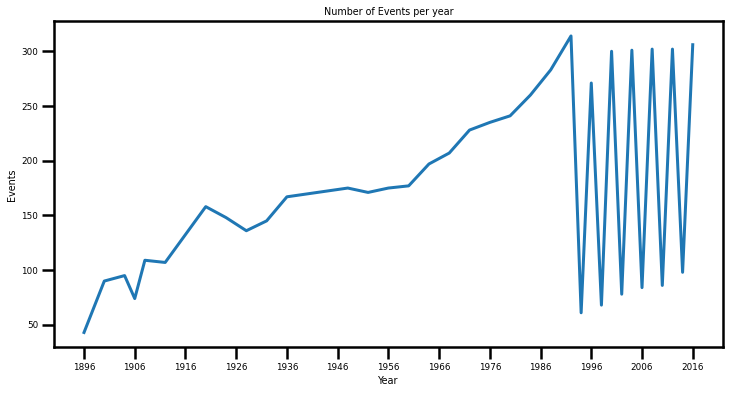

In [40]:
plt.figure(figsize=(12,6))
x_ticks = np.arange(1896, 2017, 10)
plt.xticks(x_ticks)
plt.plot(unique_years,arr_num_events_year)
plt.title('Number of Events per year')
plt.xlabel('Year')
plt.ylabel('Events')
plt.show()

## we conclude from this plot that number of events increases as we go through the years

## How did number of Sports evolve over time?

In [41]:
num_sports_year = (athlete_events.groupby(['Year']))['Sport'].nunique()

In [42]:
arr_num_sports_year=pd.Series(num_sports_year.array)

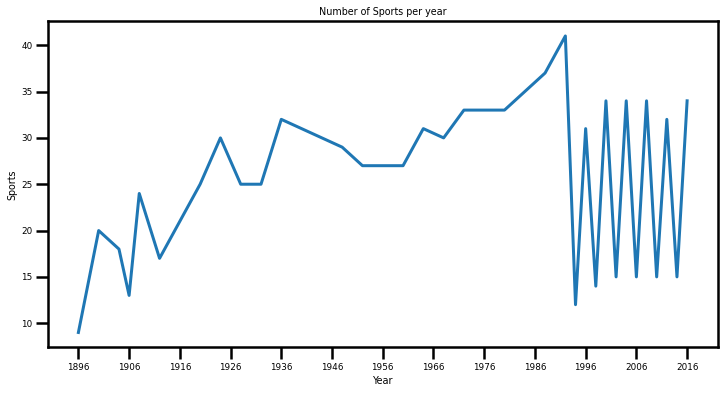

In [43]:
plt.figure(figsize=(12,6))
x_ticks = np.arange(1896, 2017, 10)
plt.xticks(x_ticks)
plt.plot(unique_years,num_sports_year)
plt.title('Number of Sports per year')
plt.xlabel('Year')
plt.ylabel('Sports')
plt.show()

## we conclude from this plot that number of sports increases as we go through the years

## What is most 10 cities that held the olympics?

In [44]:
mostcity=athlete_events.groupby('City').count()['ID'].sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='City'>

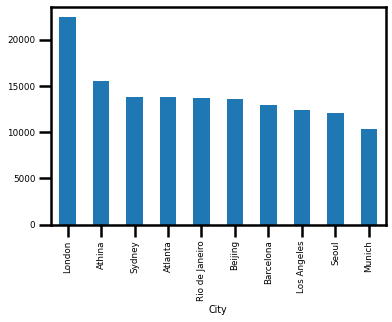

In [45]:
mostcity.plot(kind='bar')

## we conclude from this plot that London is the most city that held the olympics

## What are the least 10 cities helding the olympics?

In [46]:
leastcityy=athlete_events.groupby('City').count()['ID'].sort_values(ascending=True).head(10)

<AxesSubplot:xlabel='City'>

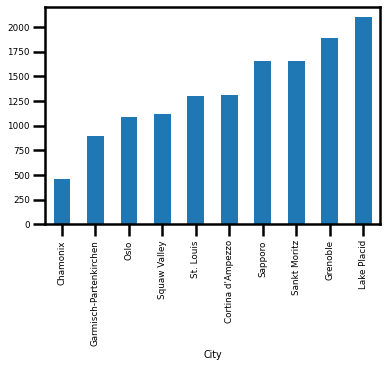

In [47]:
leastcityy.plot(kind='bar')

## we conclude from this plot that Chamonix is the least city that held the olympics

## What are the 10 most popular sports?


In [48]:
most_10sports=athlete_events.groupby('Sport').count()['ID'].sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='Sport'>

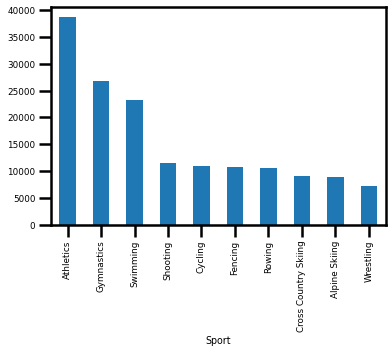

In [49]:
most_10sports.plot(kind='bar')

## we conclude from this plot the Atheltics is the most popular sport

## What is the number of athletes in olympics over time?

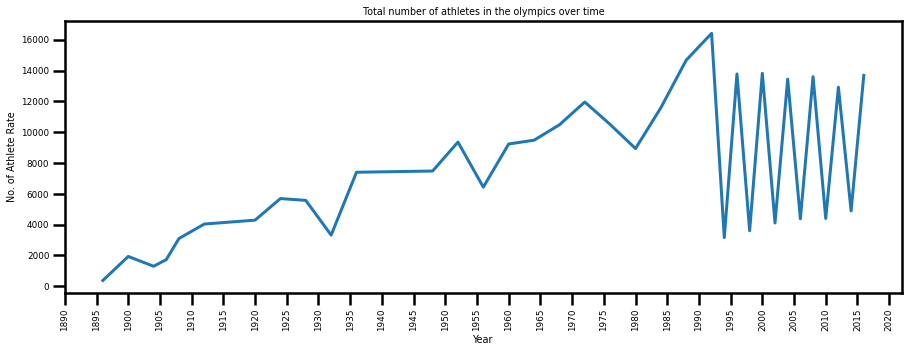

In [50]:
plt.figure(figsize=(15, 5))
num_id=(athlete_events.groupby(['Year']))['ID'].count()
plt.plot(num_id)
plt.xticks(rotation=90)
plt.xticks(np.arange(1890, 2025, 5))
plt.title('Total number of athletes in the olympics over time')
plt.xlabel('Year')
plt.ylabel('No. of Athlete Rate')
plt.show()

# Integration 

## Changing Team/NOC of some countries to match the name of the Teams in the athlete_events table

In [17]:
medals=pd.read_excel('Medals.xlsx')


In [18]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [19]:
medals['NOC']=0

In [20]:
for i in range(0,len(medals)):
    if(medals['Team/NOC'].iloc[i]=='United States of America'):
        medals['Team/NOC'].iloc[i]='United States'
    elif(medals['Team/NOC'].iloc[i]=="People's Republic of China"):
        medals['Team/NOC'].iloc[i]='China'
    elif(medals['Team/NOC'].iloc[i]=='ROC'):
        medals['Team/NOC'].iloc[i]='Russia'
    elif(medals['Team/NOC'].iloc[i]=='Republic of Korea'):
        medals['Team/NOC'].iloc[i]='South Korea'
    elif(medals['Team/NOC'].iloc[i]=='Islamic Republic of Iran'):
        medals['Team/NOC'].iloc[i]='Iran'
    elif(medals['Team/NOC'].iloc[i]=='Hong Kong, China'):
        medals['Team/NOC'].iloc[i]='China'
    elif(medals['Team/NOC'].iloc[i]=='North Macedonia'):
        medals['Team/NOC'].iloc[i]='Macedonia'
    elif(medals['Team/NOC'].iloc[i]=="Côte d'Ivoire"):
        medals['Team/NOC'].iloc[i]="Cote d'Ivoire"
    elif(medals['Team/NOC'].iloc[i]=='Republic of Moldova'):
        medals['Team/NOC'].iloc[i]='Moldova'
    elif(medals['Team/NOC'].iloc[i]=='Syrian Arab Republic'):
        medals['Team/NOC'].iloc[i]='Syria'

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
#Search for the team/noc in athlete_events table to take its NOC and be able to integrate them using that new column
for i in range(0,len(medals)):
    for j in range(0,len(athlete_events)):
        if(medals['Team/NOC'][i]==athlete_events['Team'][j]):
            medals['NOC'][i]=athlete_events['NOC'][j]
            break

<ipython-input-21-8fc6db0c70aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals['NOC'][i]=athlete_events['NOC'][j]


In [22]:
# Joining athlete_events table with noc_regions table
x=noc_regions.merge(athlete_events,how='inner',on=['NOC'])
y=x.merge(medals,how='inner',on=['NOC']) 

In [24]:
m=y.groupby(['NOC','Year','Gold','Silver','Bronze','Total'])

In [25]:
#Dataframe having each NOC won how much medals each year
final=pd.DataFrame(m.size().reset_index(name = "Group_Count"))
final.drop('Group_Count', inplace=True, axis=1)

In [26]:
final

,NOC,Year,Gold,Silver,Bronze,Total
0,ARG,1900,0,1,2,3
1,ARG,1908,0,1,2,3
2,ARG,1920,0,1,2,3
3,ARG,1924,0,1,2,3
4,ARG,1928,0,1,2,3
...,...,...,...,...,...,...
1881,VEN,2006,1,3,0,4
1882,VEN,2008,1,3,0,4
1883,VEN,2012,1,3,0,4
1884,VEN,2014,1,3,0,4


In [27]:
#Creating a new feature using Height and Weight
athlete_events['BMI']=0

In [28]:
#Filling BMI column
for i in range(0,len(athlete_events)):
    bmi=(athlete_events['Height'].iloc[i]/(athlete_events['Height'].iloc[i]/100)**2)
    athlete_events['BMI'].iloc[i]=bmi

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
#Creating other feature by discretizing age in to groups
age_group2 = pd.cut(athlete_events.Age, [10,17,22,36,51,100],labels=['child','young','young-adult','adult','old'])

athlete_events["age_group"] = age_group2

## What are the most age group participating?

In [30]:
age_groups=athlete_events.groupby(['age_group']).count()['ID'].sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Age group Medals')

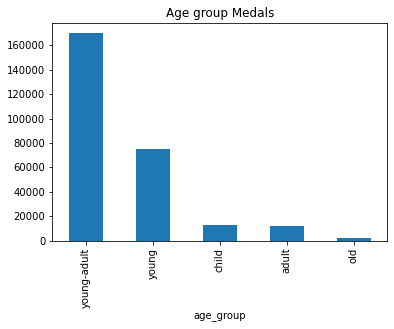

In [31]:
age_groups.plot(kind='bar')
plt.title('Age group Medals')

In [32]:
age_groups

age_group
young-adult    169696
young           75031
child           12507
adult           12142
old              1739
Name: ID, dtype: int64

## How many people participating for each BMI

In [52]:
athlete_events["BMI"] = athlete_events["BMI"].astype('int')

In [53]:
bmi_count = (athlete_events.groupby(['BMI']))['Medal'].count()

In [54]:
arr_bmi_count=pd.Series(bmi_count.array)
unique_bmi=athlete_events['BMI'].unique()
unique_bmi[::1].sort()

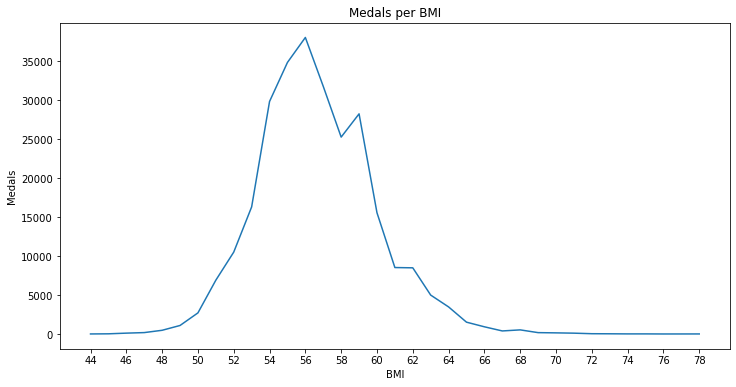

In [55]:
plt.figure(figsize=(12,6))
x_ticks = np.arange(40, 80, 2)
plt.xticks(x_ticks)
plt.plot(unique_bmi,arr_bmi_count)
plt.title('Participations per BMI')
plt.xlabel('BMI')
plt.ylabel('Participants')
plt.show()

## Identifying Outliers

In [40]:
from scipy import stats

In [58]:
athlete_events_copy=athlete_events

In [59]:
z = np.abs(stats.zscore(athlete_events_copy['Age']))

In [60]:
filtered_entries = z < 3

In [61]:
athlete_events_zscore_filter =athlete_events_copy[filtered_entries]
print(athlete_events_zscore_filter.shape)

(266710, 17)


In [62]:
outliers_count = (z >=3).sum()
print(outliers_count)

4406


In [63]:
athlete_events_zscore_filter

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,age_group
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,55,young-adult
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,58,young-adult
2,3,Gunnar Nielsen Aaby,M,24.0,177.501375,73.107943,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,56,young-adult
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,54,young-adult
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,54,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,55,young-adult
271112,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,56,young-adult
271113,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,56,young-adult
271114,135571,Tomasz Ireneusz ya,M,30.0,185.000000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,54,young-adult


<AxesSubplot:xlabel='Height'>

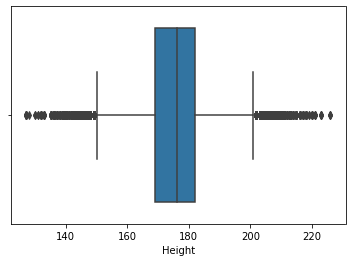

In [56]:
sns.boxplot(x='Height',data=athlete_events_zscore_filter)

<AxesSubplot:ylabel='Weight'>

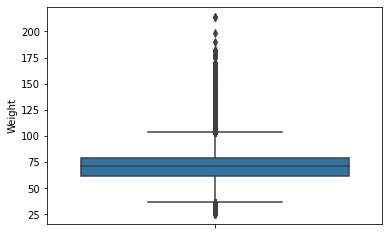

In [57]:
sns.boxplot(y='Weight',data=athlete_events_zscore_filter)

In [64]:
height_group = pd.cut(athlete_events_zscore_filter.Height, [0,151,171,181,201,230],labels=['150-','150-170','170-180','180-200','200+'])

athlete_events_zscore_filter["height_group"] = height_group

<ipython-input-64-f4ece9bfb4cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_events_zscore_filter["height_group"] = height_group


In [66]:
height_groups=athlete_events_zscore_filter.groupby(['height_group']).count()['ID'].sort_values(ascending=False).head(10)

In [67]:
height_groups

height_group
170-180    109307
150-170     86740
180-200     66716
150-         2382
200+         1565
Name: ID, dtype: int64

Text(0.5, 1.0, 'Height group')

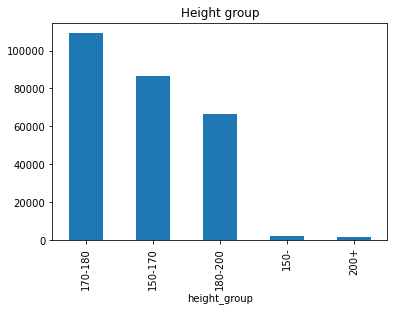

In [68]:
height_groups.plot(kind='bar')
plt.title('Height group')

## Removing Heights below 150 and above 200 as they are outliers

In [85]:
athlete_events_zscore_filter=athlete_events_zscore_filter[(athlete_events_zscore_filter['height_group']!='200+')&(athlete_events_zscore_filter['height_group']!='150-')]
        

## Removing weights that are outliers

In [87]:
z = np.abs(stats.zscore(athlete_events_zscore_filter['Weight']))
filtered_entries = z < 3
athlete_events_zscore_filter =athlete_events_zscore_filter[filtered_entries]


In [88]:
athlete_events_zscore_filter

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI,age_group,height_group
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,55,young-adult,170-180
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,58,young-adult,150-170
2,3,Gunnar Nielsen Aaby,M,24.0,177.501375,73.107943,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,56,young-adult,170-180
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,54,young-adult,180-200
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,54,young,180-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,55,young-adult,170-180
271112,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,56,young-adult,170-180
271113,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,56,young-adult,170-180
271114,135571,Tomasz Ireneusz ya,M,30.0,185.000000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,54,young-adult,180-200


## What is the relation between medals and bmi

Text(0, 0.5, 'Medals')

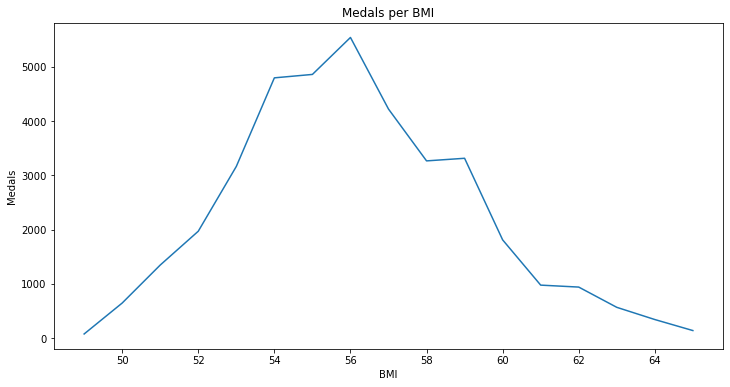

In [165]:
medal_for_each_bmi=athlete_events_zscore_filter.groupby(['BMI','Medal'])['ID'].count()
medal_for_each_bmi=medal_for_each_bmi.to_frame().reset_index()


medal_for_each_bmi=b.to_frame().reset_index()
medal_for_each_bmi=medal_for_each_bmi[medal_for_each_bmi['Medal']!='No Medal']
bmi_unique=medal_for_each_bmi['BMI'].unique() 
bmi_medal_values=[]
for i in range(0,len(bmi_unique)):
    count=0
    for j in range(0,len(medal_for_each_bmi)):
        if(bmi_unique[i]==medal_for_each_bmi['BMI'].iloc[j]):
            count+=medal_for_each_bmi['ID'].iloc[j] 
    bmi_medal_values.append(count)
plt.figure(figsize=(12,6))
plt.plot(bmi_unique,bmi_medal_values)

plt.title('Medals per BMI')
plt.xlabel('BMI')
plt.ylabel('Medals')

## Medals per age group

Text(0, 0.5, 'Medals')

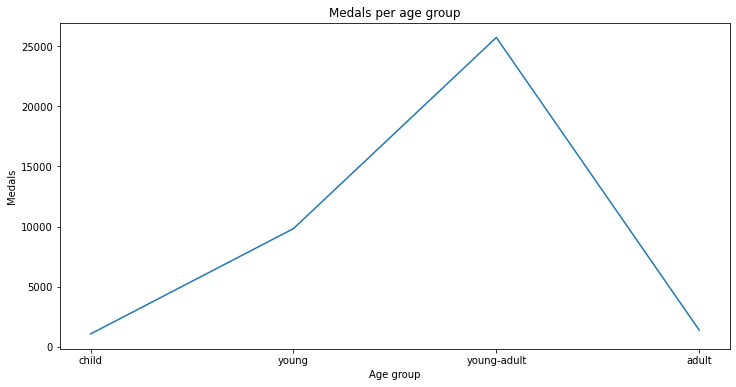

In [167]:
medals_age_groups=athlete_events_zscore_filter.groupby(['age_group','Medal']).count()['ID']
medals_age_groups=medals_age_groups.to_frame().reset_index()
medals_age_groups=medals_age_groups[medals_age_groups['Medal']!='No Medal']
age_group_unique=medals_age_groups['age_group'].unique() 
age_group_medal_values=[]
for i in range(0,len(age_group_unique)):
    count=0
    for j in range(0,len(medals_age_groups)):
        if(age_group_unique[i]==medals_age_groups['age_group'].iloc[j]):
            count+=medals_age_groups['ID'].iloc[j] 
    age_group_medal_values.append(count)
plt.figure(figsize=(12,6))
plt.plot(age_group_unique,age_group_medal_values)

plt.title('Medals per age group')
plt.xlabel('Age group')
plt.ylabel('Medals')

## Another try of merging to get number o medals each team got each year

In [71]:
gold=x[x['Medal']=='Gold']
gold=gold.groupby(['Year','NOC'])['Medal'].count().to_frame().reset_index()
gold.columns=['Year','NOC','Gold']

silver=x[x['Medal']=='Silver']
silver=silver.groupby(['Year','NOC'])['Medal'].count().to_frame().reset_index()
silver.columns=['Year','NOC','Silver']

bronze=x[x['Medal']=='Bronze']
bronze=bronze.groupby(['Year','NOC'])['Medal'].count().to_frame().reset_index()
bronze.columns=['Year','NOC','Bronze']

no_medal=x[x['Medal']=='No Medal']
no_medal=no_medal.groupby(['Year','NOC'])['Medal'].count().to_frame().reset_index()
no_medal.columns=['Year','NOC','No Medal']

In [76]:
new_df1=bronze.merge(no_medal,on=['NOC','Year'])

In [77]:
new_df2=new_df1.merge(silver,on=['NOC','Year'])

In [78]:
new_df3=new_df2.merge(gold,on=['NOC','Year'])

In [79]:
new_df3

,Year,NOC,Bronze,No Medal,Silver,Gold
0,1896,AUT,2,3,1,2
1,1896,DEN,3,9,2,1
2,1896,FRA,2,15,4,5
3,1896,GBR,3,16,3,3
4,1896,GER,2,62,5,25
...,...,...,...,...,...,...
752,2016,THA,2,52,2,2
753,2016,TUR,4,111,3,1
754,2016,UKR,5,257,8,2
755,2016,USA,71,455,54,139


In [131]:
# medals_age_groups=athlete_events_zscore_filter.groupby(['age_group','Medal']).count()['ID']
# medals_age_groups=medals_age_groups.to_frame().reset_index()
# medals_age_groups=medals_age_groups[medals_age_groups['Medal']!='No Medal']
# age_group_unique=medals_age_groups['age_group'].unique() 
# age_group_medal_values=[]
# for i in range(0,len(age_group_unique)):
#     count=0
#     for j in range(0,len(medals_age_groups)):
#         if(age_group_unique[i]==medals_age_groups['age_group'].iloc[j]):
#             count+=medals_age_groups['ID'].iloc[j] 
#     age_group_medal_values.append(count)
# plt.figure(figsize=(12,6))
# plt.plot(age_group_unique,age_group_medal_values)

# plt.title('Medals per age group')
# plt.xlabel('Age group')
# plt.ylabel('Medals')

In [175]:
# year_noc_medals=athlete_events_zscore_filter.groupby(['Year','NOC','Medal']).count()['ID']

In [ ]:
# year_noc_medals=year_noc_medals.to_frame().reset_index()

In [176]:
# year_noc_medals=year_noc_medals[year_noc_medals['Medal']!='No Medal']

In [195]:
# unique_year_noc=[]
# year=year_noc_medals['Year']
# noc=year_noc_medals['NOC']
# for i in range(0,len(year_noc_medals)):
#     val=str(year_noc_medals['Year'].iloc[i])+' '+year_noc_medals['NOC'].iloc[i]
#     unique_year_noc.append(val)

In [203]:
# unique_year_noc=np.array(unique_year_noc)
# unique_year_noc=unique_year_noc.astype('object')
# unique_year_noc=np.unique(unique_year_noc)

In [243]:
# year_noc_medal_values=[]
# for i in range(0,len(unique_year_noc)):
#     count=0
#     for j in range(0,len(year_noc_medals)):
#         if((int(unique_year_noc[i].split()[0])==year_noc_medals['Year'].iloc[j])&(unique_year_noc[i].split()[1]==year_noc_medals['NOC'].iloc[j])):
#             count+=year_noc_medals['ID'].iloc[j] 
#     year_noc_medal_values.append(count)
# # plt.figure(figsize=(12,6))
# # plt.plot(age_group_unique,age_group_medal_values)

In [251]:
# len(year_noc_medal_values)

In [250]:
# len(unique_year_noc)